In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
import switch_metrics as sm
sys.path.append('/mnt/home/szheng/projects/util_code/hpc')
import get_ripple_time_participation_cofiring as grtpc
reload(grtpc)

<module 'get_ripple_time_participation_cofiring' from '/mnt/home/szheng/projects/util_code/hpc/get_ripple_time_participation_cofiring.py'>

In [4]:
data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] 

In [5]:
res = sm.add_switch_metrics_wrapper(data_dir_full,
                        dosave=False, save_dir='switch_analysis',save_fn='all_switch_info.p',
                        force_reload=False,
                        load_only=True)
plt.close()
spk_beh_df=res['spk_beh_df']
cell_cols_d=res['cell_cols_d']
fr_map_trial_df_d=res['fr_map_trial_df_d']
all_sw_info=res['all_sw_info']
pf_all_field_combined = res['pf_all_field_combined']
changes_df_combined = res['changes_df_combined']

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_switch_info.p exists; loading---


In [6]:
# load data
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
# behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']


prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
# beh_df = prep_res['beh_df'].as_dataframe()
# beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
# spike_trains = prep_res['spike_trains']

In [7]:
%%time
import pairwise_analysis as pwa
reload(pwa)
ripple_sim_d = pwa.get_all_ripple_pairwise_sim(cell_metrics,ripples,mergepoints)

CPU times: user 21.3 s, sys: 32.7 ms, total: 21.3 s
Wall time: 21.3 s


In [9]:
reload(pwa)
beh_corr_all = pwa.get_beh_corr(spk_beh_df,cell_cols=None,window=3,window_size=0.1,speed_key='v',speed_thresh=1.)




Text(0, 0.5, 'geodesic distance')

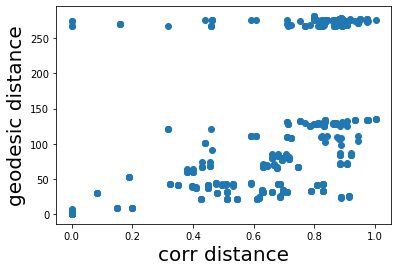

In [349]:
# plt.scatter(corr_d.values,geo_d.values)
# plt.xlabel('corr distance')
# plt.ylabel('geodesic distance')

In [373]:

# ma=(corr_d<0.1) & (geo_d > 200)
# print(geo_d.loc[ma])
# print(corr_d.loc[ma])

(extended, count_between_interval, 1)  (ripple_only, count_between_interval, 1)    274.579077
(extended, count_in_interval, 1)       (ripple_only, count_in_interval, 1)         267.536211
(extended, rate_between_interval, 1)   (ripple_only, rate_between_interval, 1)     274.577841
(extended, rate_in_interval, 1)        (ripple_only, rate_in_interval, 1)          267.536212
dtype: float64
(extended, count_between_interval, 1)  (ripple_only, count_between_interval, 1)    0.000000e+00
(extended, count_in_interval, 1)       (ripple_only, count_in_interval, 1)         0.000000e+00
(extended, rate_between_interval, 1)   (ripple_only, rate_between_interval, 1)     2.220446e-16
(extended, rate_in_interval, 1)        (ripple_only, rate_in_interval, 1)          0.000000e+00
dtype: float64


# get_sw_sim

In [10]:
reload(pwa)
sw_sim_allonoff, time_diff_allonoff=pwa.get_sw_sim(all_sw_info,win_l=[1,10,30,60],decay_rate_l=[0.003,0.007,0.01,0.05,0.1])



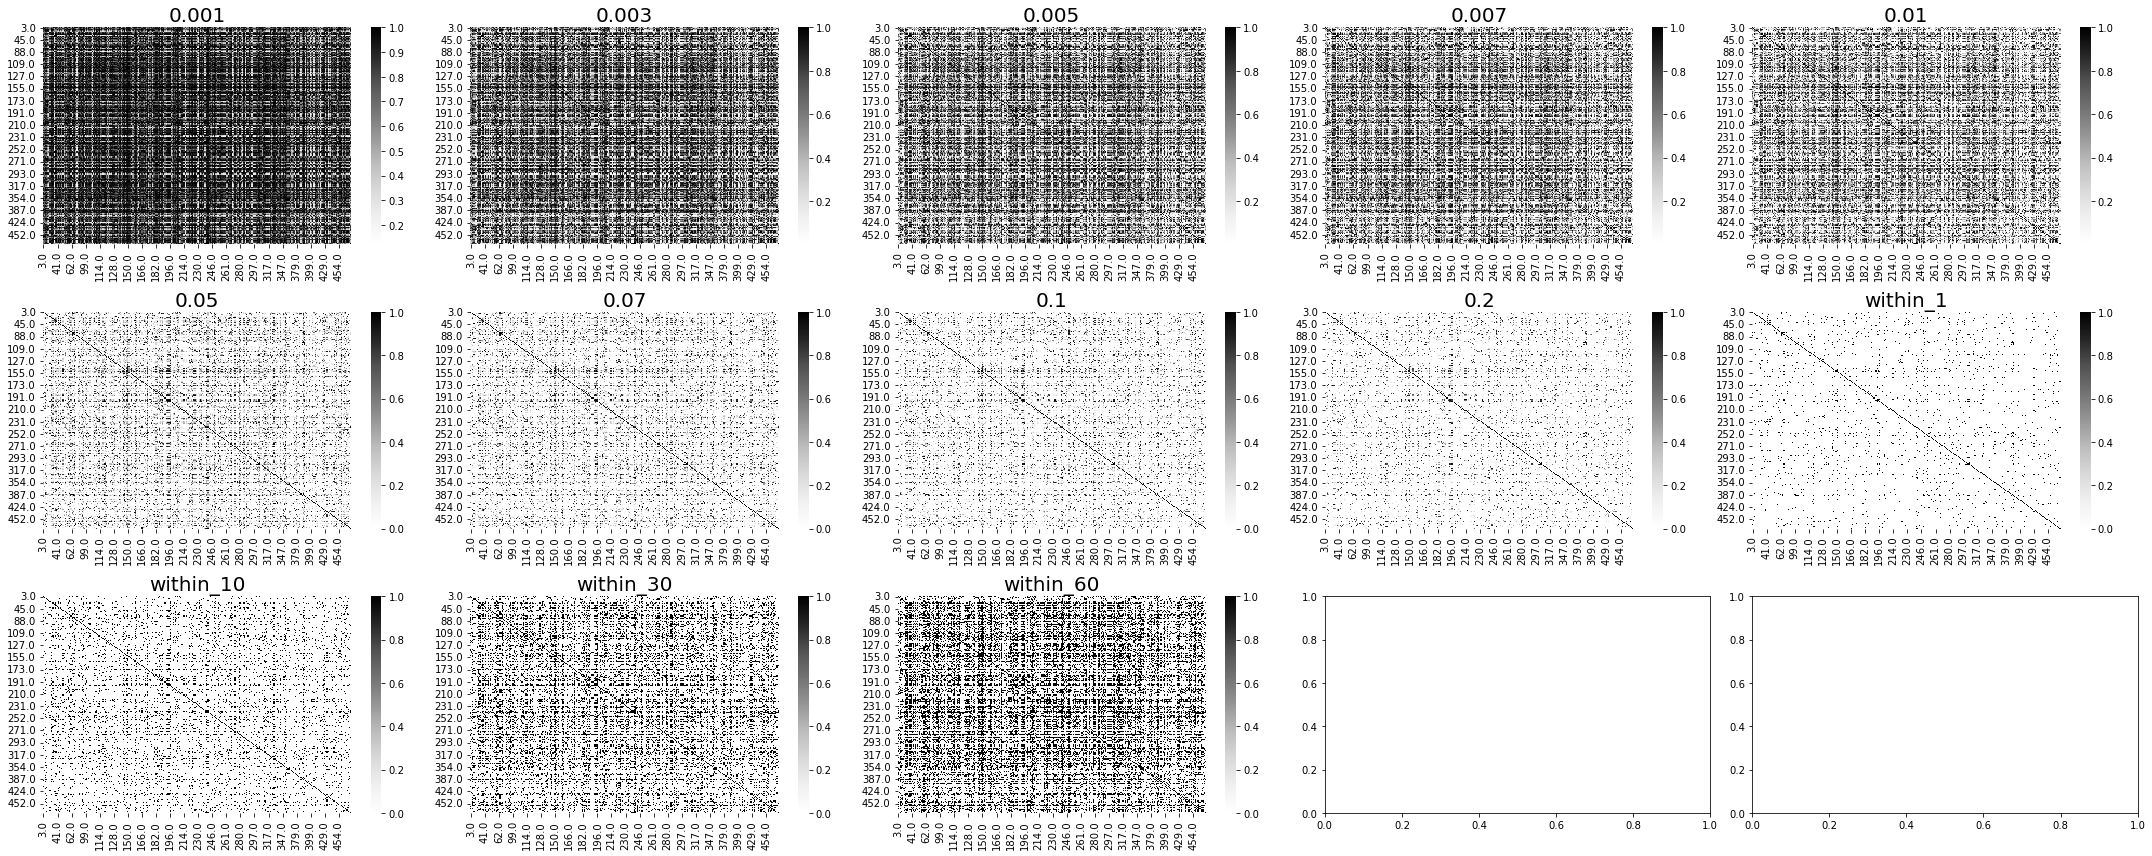

In [12]:
nplots = sw_sim_d.index.get_level_values(0).nunique()
fig,axs=ph.subplots_wrapper(nplots)
for ii,(k,val) in enumerate(sw_sim_d.groupby(level=0)):
    ax=axs.ravel()[ii]
    sns.heatmap(val.loc[k],ax=ax,cmap='Greys')
    ax.set_title(k)
    ax.set(ylabel=None)
plt.tight_layout()

### explore converting distance to similarity

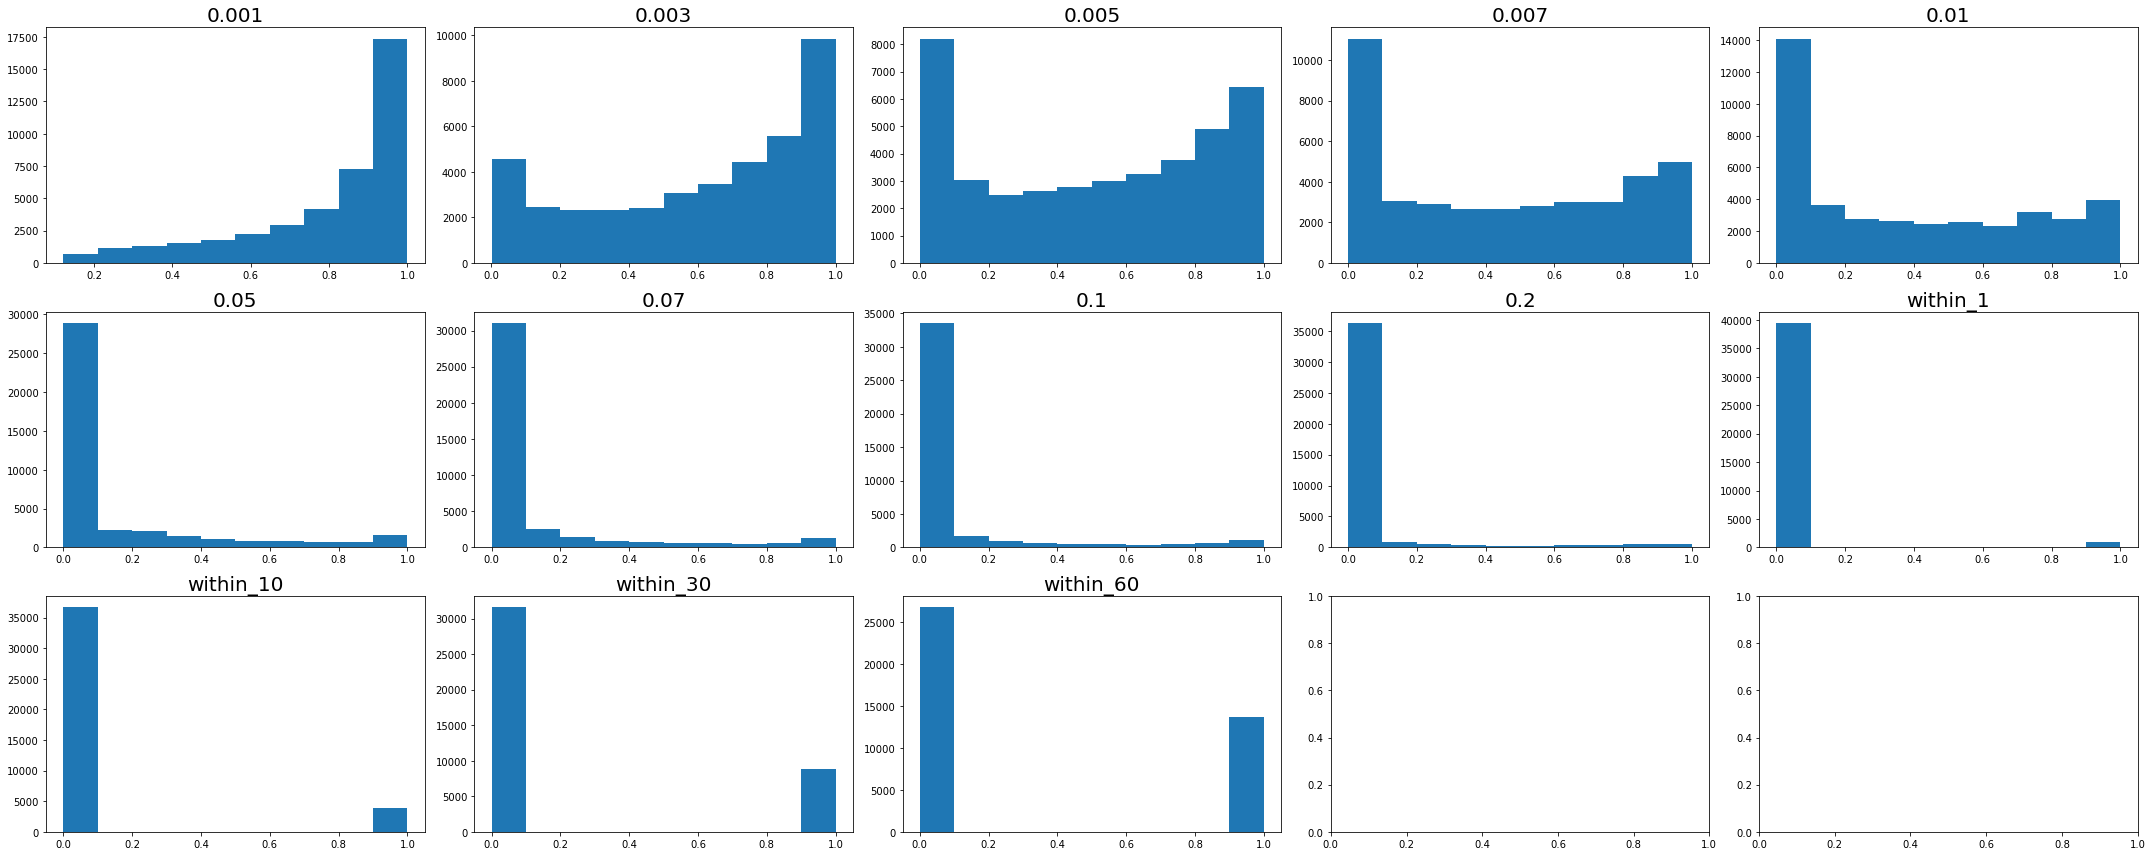

In [13]:
%matplotlib inline
nplots = sw_sim_d.index.get_level_values(0).nunique()
fig,axs=ph.subplots_wrapper(nplots)
for ii,(k,val) in enumerate(sw_sim_d.groupby(level=0)):
    ax=axs.ravel()[ii]
    xx=val.values
    xx = xx[np.triu_indices_from(xx,1)]
    ax.hist(xx)
    ax.set_title(k)
plt.tight_layout()

# try some correlation!!!

In [11]:
# beh_corr_all.index=beh_corr_all.index.set_names(['task_index','trialtype_index','uid'])

# ripple_sim_d.index = ripple_sim_d.index.set_names(['window','ripple_sim_type','epoch','uid'])

label_sim_all = list(ripple_sim_d.groupby(level=(0,1,2)))+list(beh_corr_all.groupby(level=(0,1))) 

# label_sim_all = list(ripple_sim_d.loc['ripple_only'].groupby(level=(0,1)))+list(beh_corr_all.loc[(slice(None),'both'),:].groupby(level=(0,1))) 

In [12]:
%%time
# sw_label_distance_d = {}
sw_label_distance_df_onoff = {}
for onoff,sw_sim_d in sw_sim_allonoff.groupby(level=0):
    sw_sim_d=sw_sim_d.loc[onoff]
    sw_label_distance_df = []
    for k,sw_sim in sw_sim_d.groupby(level=0):
        for kk,label_sim in label_sim_all:
            geo = pwa.geodesic_distance(label_sim.loc[kk],sw_sim.loc[k])
            corr,pval = pwa.corr_distance(label_sim.loc[kk],sw_sim.loc[k])
            kk_names = label_sim.index.names[:-1]
            #         sw_label_distance_d[(k,kk)]=pd.Series([geo,corr],index=['geo','corr'])
            distance_one=pd.Series([geo,corr,k,*kk],index=['geo','corr','sw_sim_type',*kk_names])
            sw_label_distance_df.append(distance_one)
    sw_label_distance_df = pd.DataFrame(sw_label_distance_df)
    sw_label_distance_df_onoff[onoff] = sw_label_distance_df
sw_label_distance_df_onoff = pd.concat(sw_label_distance_df_onoff,axis=0)

CPU times: user 3min 12s, sys: 2min 44s, total: 5min 56s
Wall time: 1min 30s


In [476]:
# sw_label_distance_df_onoff_old = sw_label_distance_df_onoff

In [578]:
sw_label_distance_df_onoff.loc[1].sort_values('corr')

geo      corr sw_sim_type         ripple_sim_type  epoch  \
1    40.101063  0.810049       0.003  count_between_interval    1.0   
17   40.155780  0.823951       0.007  count_between_interval    1.0   
33   41.566185  0.835668        0.01  count_between_interval    1.0   
95   31.596609  0.859612    within_1                     NaN    NaN   
129  42.338352  0.876274   within_60  count_between_interval    1.0   
..         ...       ...         ...                     ...    ...   
12   54.026002  0.996012       0.003        rate_in_interval    0.0   
124  31.630532  0.996434   within_30        rate_in_interval    0.0   
108  29.906288  0.997178   within_10        rate_in_interval    0.0   
140  33.346379  0.997666   within_60        rate_in_interval    0.0   
141  23.749006  0.999782   within_60        rate_in_interval    1.0   

     task_index trialtype_index  
1           NaN             NaN  
17          NaN             NaN  
33          NaN             NaN  
95          0.0            both  
129         NaN             NaN  
..          ...             ...  
12          NaN             NaN  
124         NaN             NaN  
108         NaN             NaN  
140         NaN             NaN  
141         NaN             NaN  

[144 rows x 7 columns]

#### now need to select meaningful comparisons; both from the view of sw and label; to find setups that minimize the distances

In [603]:
sw_label_distance_df_onoff

geo      corr sw_sim_type       window  \
-1   0    54.384773  0.953582       0.003     extended   
     1    40.094740  0.897380       0.003     extended   
     2    53.833504  0.931797       0.003     extended   
     3    53.357182  0.992234       0.003     extended   
     4    33.313043  0.995373       0.003     extended   
...             ...       ...         ...          ...   
both 292  23.611917  0.992253   within_60  ripple_only   
     293  34.961770  0.998612   within_60  ripple_only   
     294  37.193560  0.976084   within_60          NaN   
     295  39.491483  0.976694   within_60          NaN   
     296  37.901150  0.973535   within_60          NaN   

                 ripple_sim_type  epoch  task_index trialtype_index  
-1   0    count_between_interval    0.0         NaN             NaN  
     1    count_between_interval    1.0         NaN             NaN  
     2    count_between_interval    2.0         NaN             NaN  
     3         count_in_interval    0.0         NaN             NaN  
     4         count_in_interval    1.0         NaN             NaN  
...                          ...    ...         ...             ...  
both 292        rate_in_interval    1.0         NaN             NaN  
     293        rate_in_interval    2.0         NaN             NaN  
     294                     NaN    NaN         0.0             0.0  
     295                     NaN    NaN         0.0             1.0  
     296                     NaN    NaN         0.0            both  

[891 rows x 8 columns]

In [605]:
data

0      count_between_interval
1      count_between_interval
2      count_between_interval
3           count_in_interval
4           count_in_interval
                ...          
292          rate_in_interval
293          rate_in_interval
294                  behavior
295                  behavior
296                  behavior
Name: ripple_sim_type, Length: 297, dtype: object

<IPython.core.display.Javascript object>


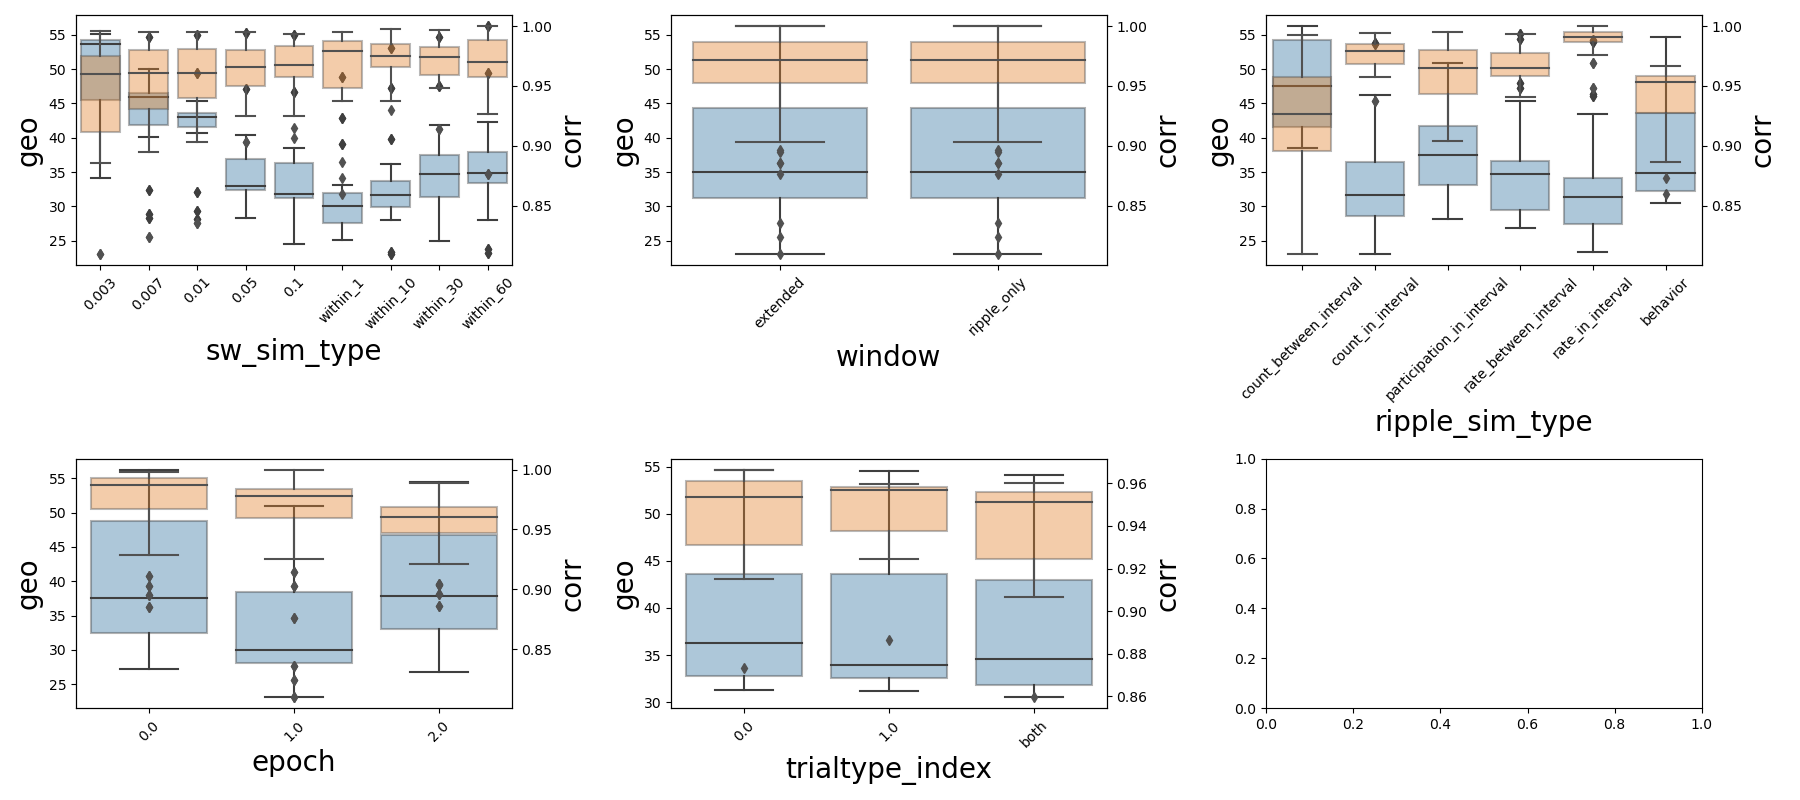

In [609]:
# sw_label_distance_df['ripple_sim_type'] = sw_label_distance_df['ripple_sim_type'].fillna('behavior')
data = copy.copy(sw_label_distance_df_onoff.loc[1])
data['ripple_sim_type']=data['ripple_sim_type'].fillna('behavior')
%matplotlib notebook
x_l = ['sw_sim_type','window','ripple_sim_type','epoch','trialtype_index']
fig,axs=ph.subplots_wrapper(len(x_l))
for ii,x in enumerate(x_l):
    ax=axs.ravel()[ii]
    ax=sns.boxplot(data=data,x=x,y='geo',color='C0',ax=ax,boxprops={'alpha':0.4})
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    ax2 = ax.twinx()
    ax=sns.boxplot(data=data,x=x,y='corr',color='C1',ax=ax2,boxprops={'alpha':0.4})
plt.tight_layout()
fn = os.path.join(data_dir_full,'py_figures','switch_analysis','switch_label_distance_agg_by_label_features_on.pdf')
fig.savefig(fn,bbox_inches='tight')

#### seperate into sw_sim_type, boxplot vs ripple_sim_type

In [597]:
sw_label_distance_df_onoff.loc[1]

geo      corr sw_sim_type         ripple_sim_type  epoch  \
0    54.734565  0.885544       0.003  count_between_interval    0.0   
1    40.101063  0.810049       0.003  count_between_interval    1.0   
2    52.242078  0.885925       0.003  count_between_interval    2.0   
3    53.749905  0.974762       0.003       count_in_interval    0.0   
4    35.053280  0.978425       0.003       count_in_interval    1.0   
..         ...       ...         ...                     ...    ...   
139  35.875627  0.959669   within_60   rate_between_interval    2.0   
140  33.346379  0.997666   within_60        rate_in_interval    0.0   
141  23.749006  0.999782   within_60        rate_in_interval    1.0   
142  34.046107  0.988786   within_60        rate_in_interval    2.0   
143  37.926010  0.957853   within_60                     NaN    NaN   

     task_index trialtype_index  
0           NaN             NaN  
1           NaN             NaN  
2           NaN             NaN  
3           NaN             NaN  
4           NaN             NaN  
..          ...             ...  
139         NaN             NaN  
140         NaN             NaN  
141         NaN             NaN  
142         NaN             NaN  
143         0.0            both  

[144 rows x 7 columns]

<IPython.core.display.Javascript object>


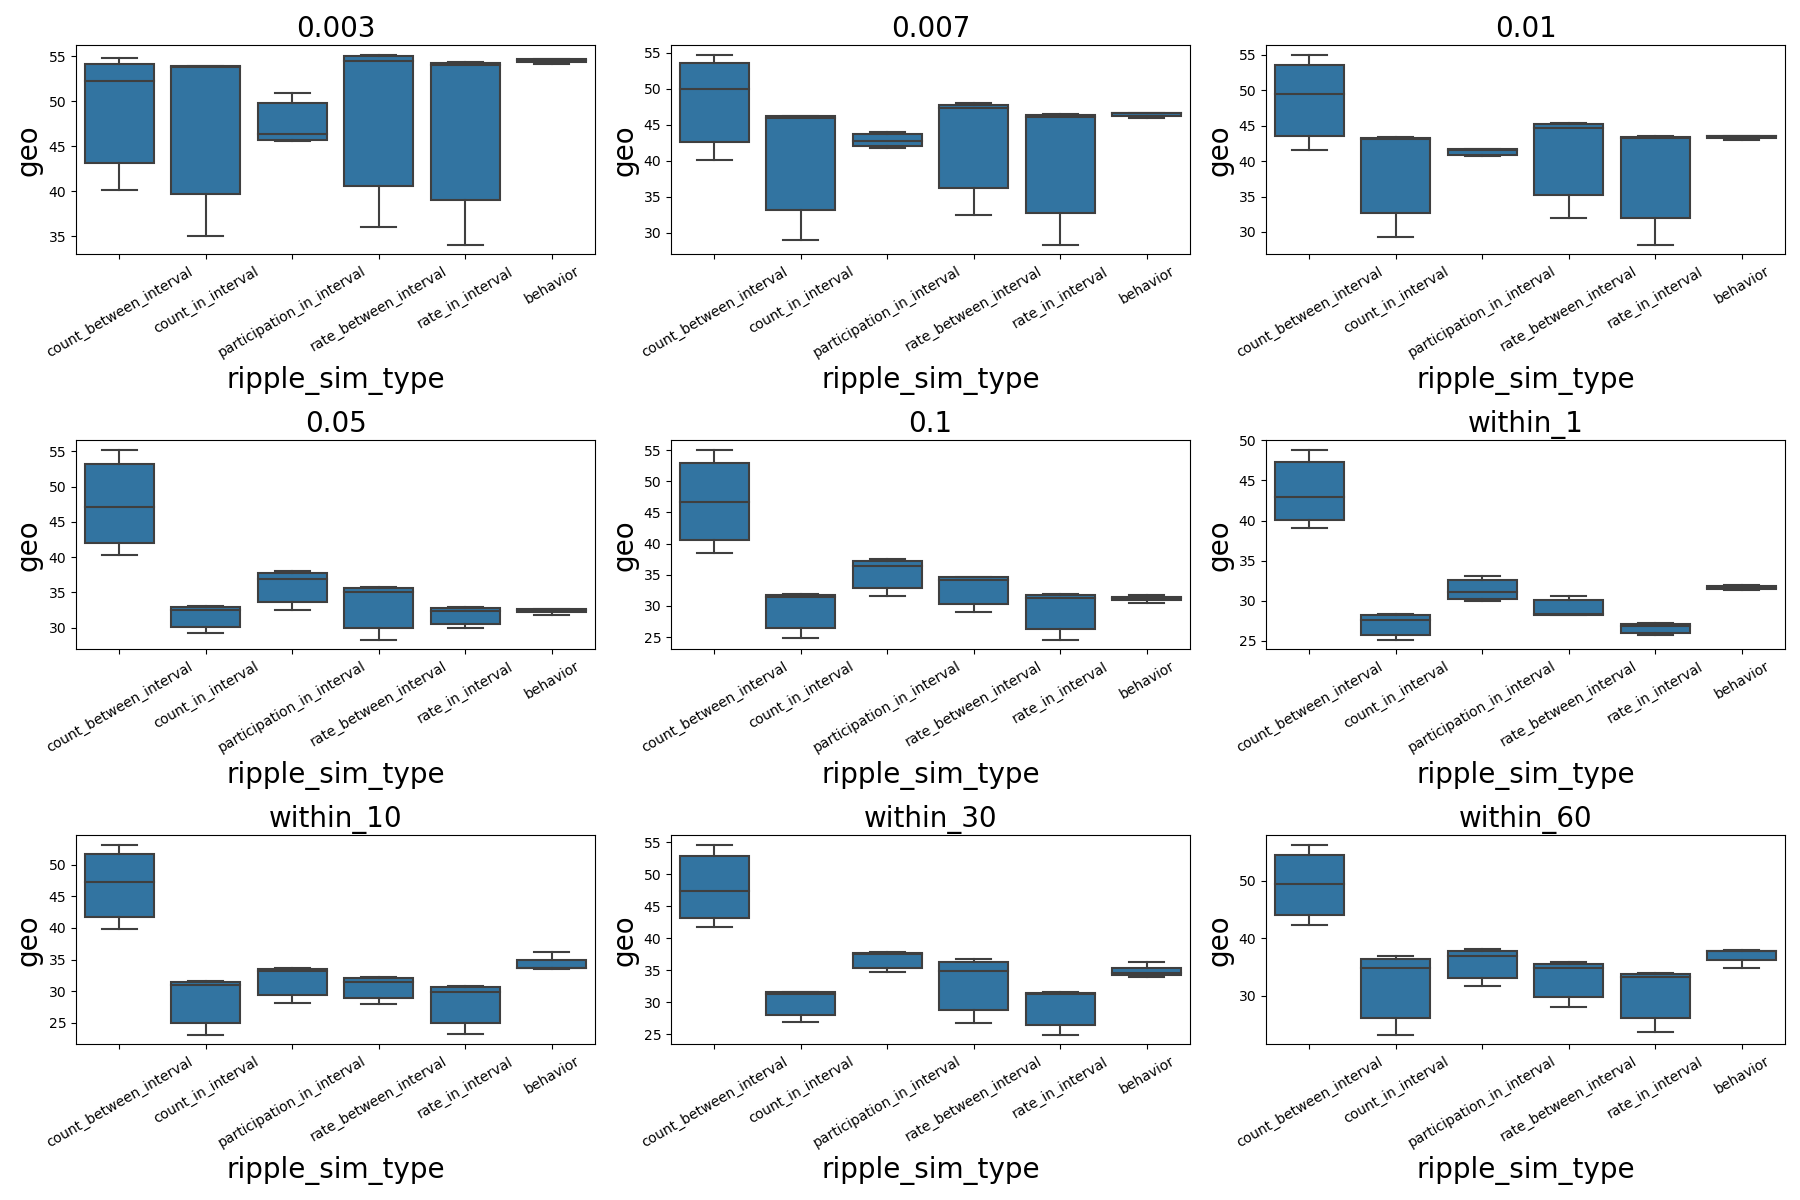

In [610]:
%matplotlib notebook
nplots = sw_label_distance_df['sw_sim_type'].nunique()
fig,axs = ph.subplots_wrapper(nplots)
data=copy.copy(sw_label_distance_df_onoff.loc[1])
data['ripple_sim_type']=data['ripple_sim_type'].fillna('behavior')
for ii,(key,val) in enumerate(data.groupby('sw_sim_type')):
    ax = axs.ravel()[ii]
    ax=sns.boxplot(data=val,x='ripple_sim_type',y='geo',color='C0',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(key)
plt.tight_layout()
fn = os.path.join(data_dir_full,'py_figures','switch_analysis','switch_label_distance_geo_vs_label_type_on.pdf')
fig.savefig(fn,bbox_inches='tight')

<IPython.core.display.Javascript object>


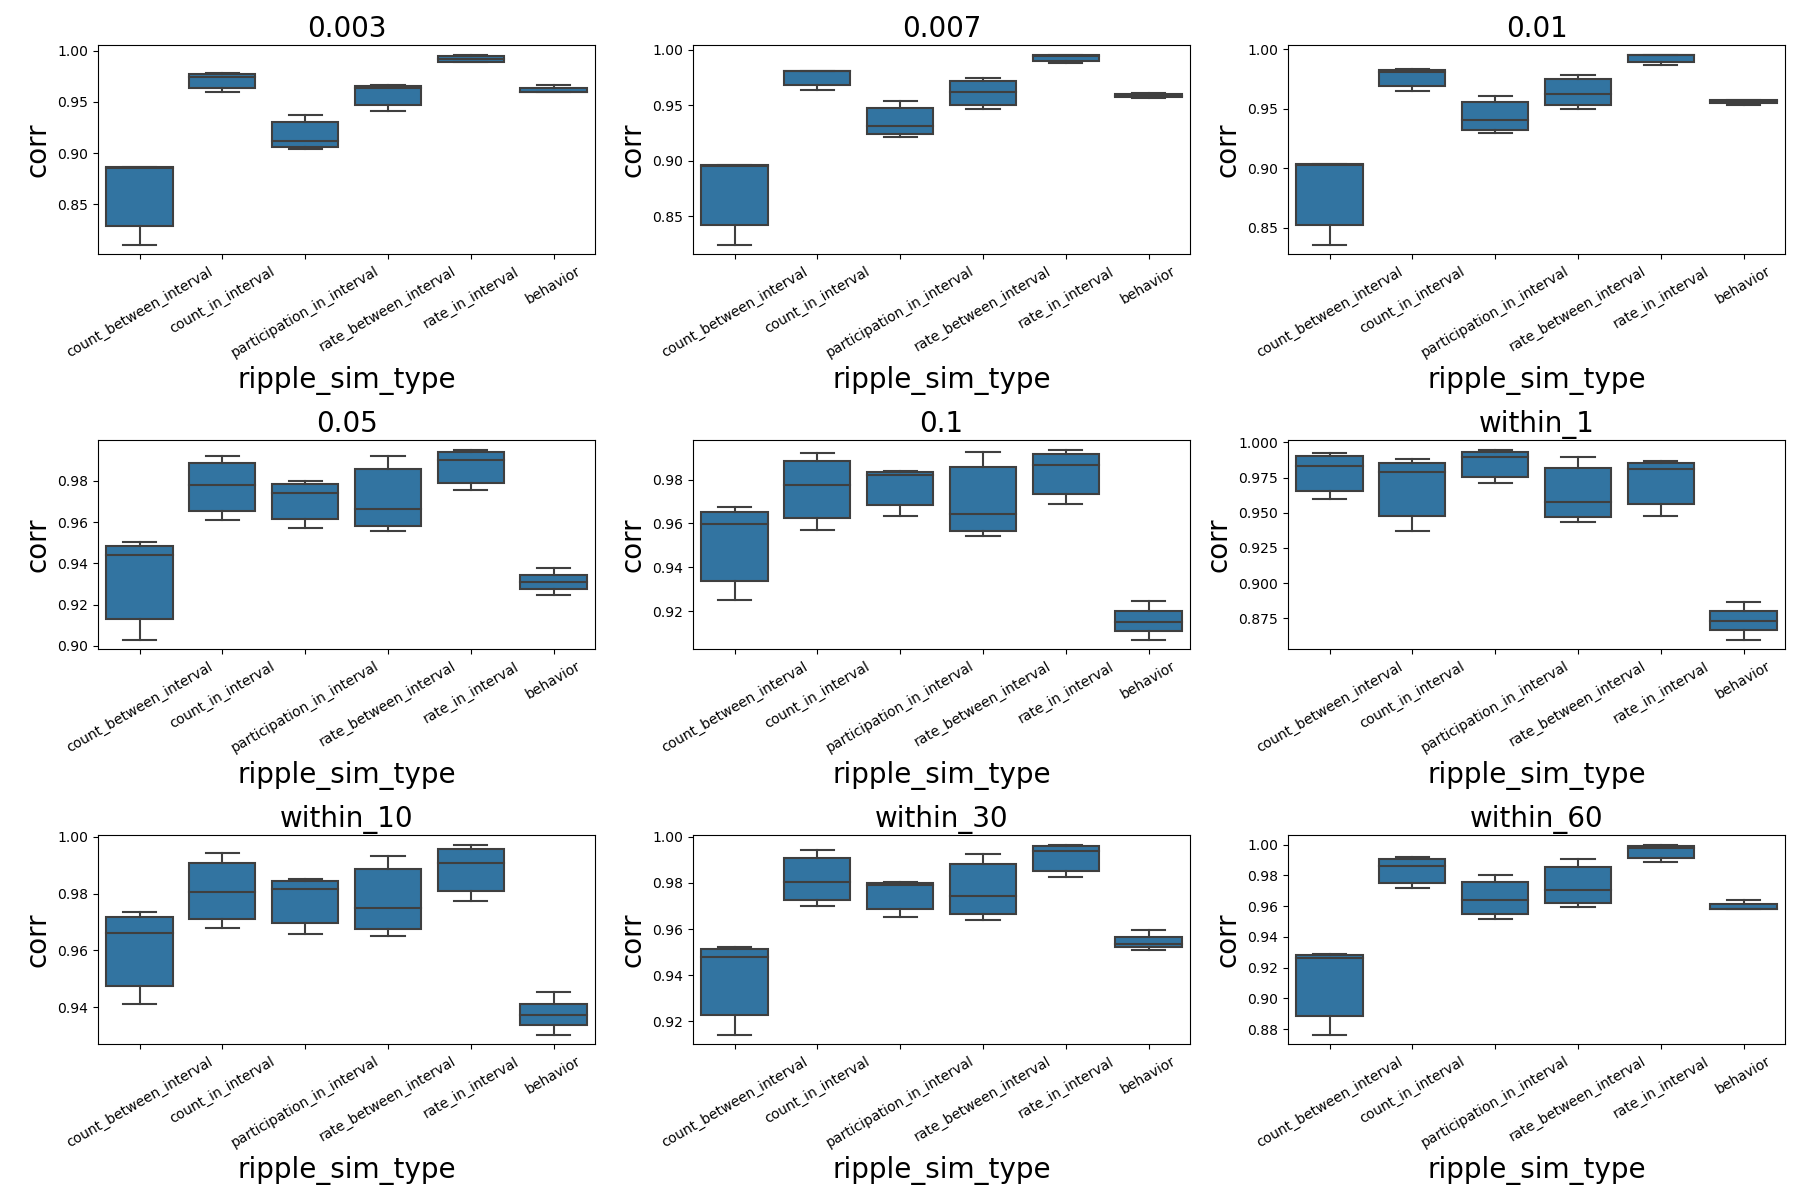

In [611]:
%matplotlib notebook
nplots = sw_label_distance_df['sw_sim_type'].nunique()
fig,axs = ph.subplots_wrapper(nplots)
data=copy.copy(sw_label_distance_df_onoff.loc[1])
data['ripple_sim_type']=data['ripple_sim_type'].fillna('behavior')
for ii,(key,val) in enumerate(data.groupby('sw_sim_type')):
    ax = axs.ravel()[ii]
    ax=sns.boxplot(data=val,x='ripple_sim_type',y='corr',color='C0',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(key)
plt.tight_layout()
fn = os.path.join(data_dir_full,'py_figures','switch_analysis','switch_label_distance_corr_vs_label_type_on.pdf')
fig.savefig(fn,bbox_inches='tight')

<IPython.core.display.Javascript object>


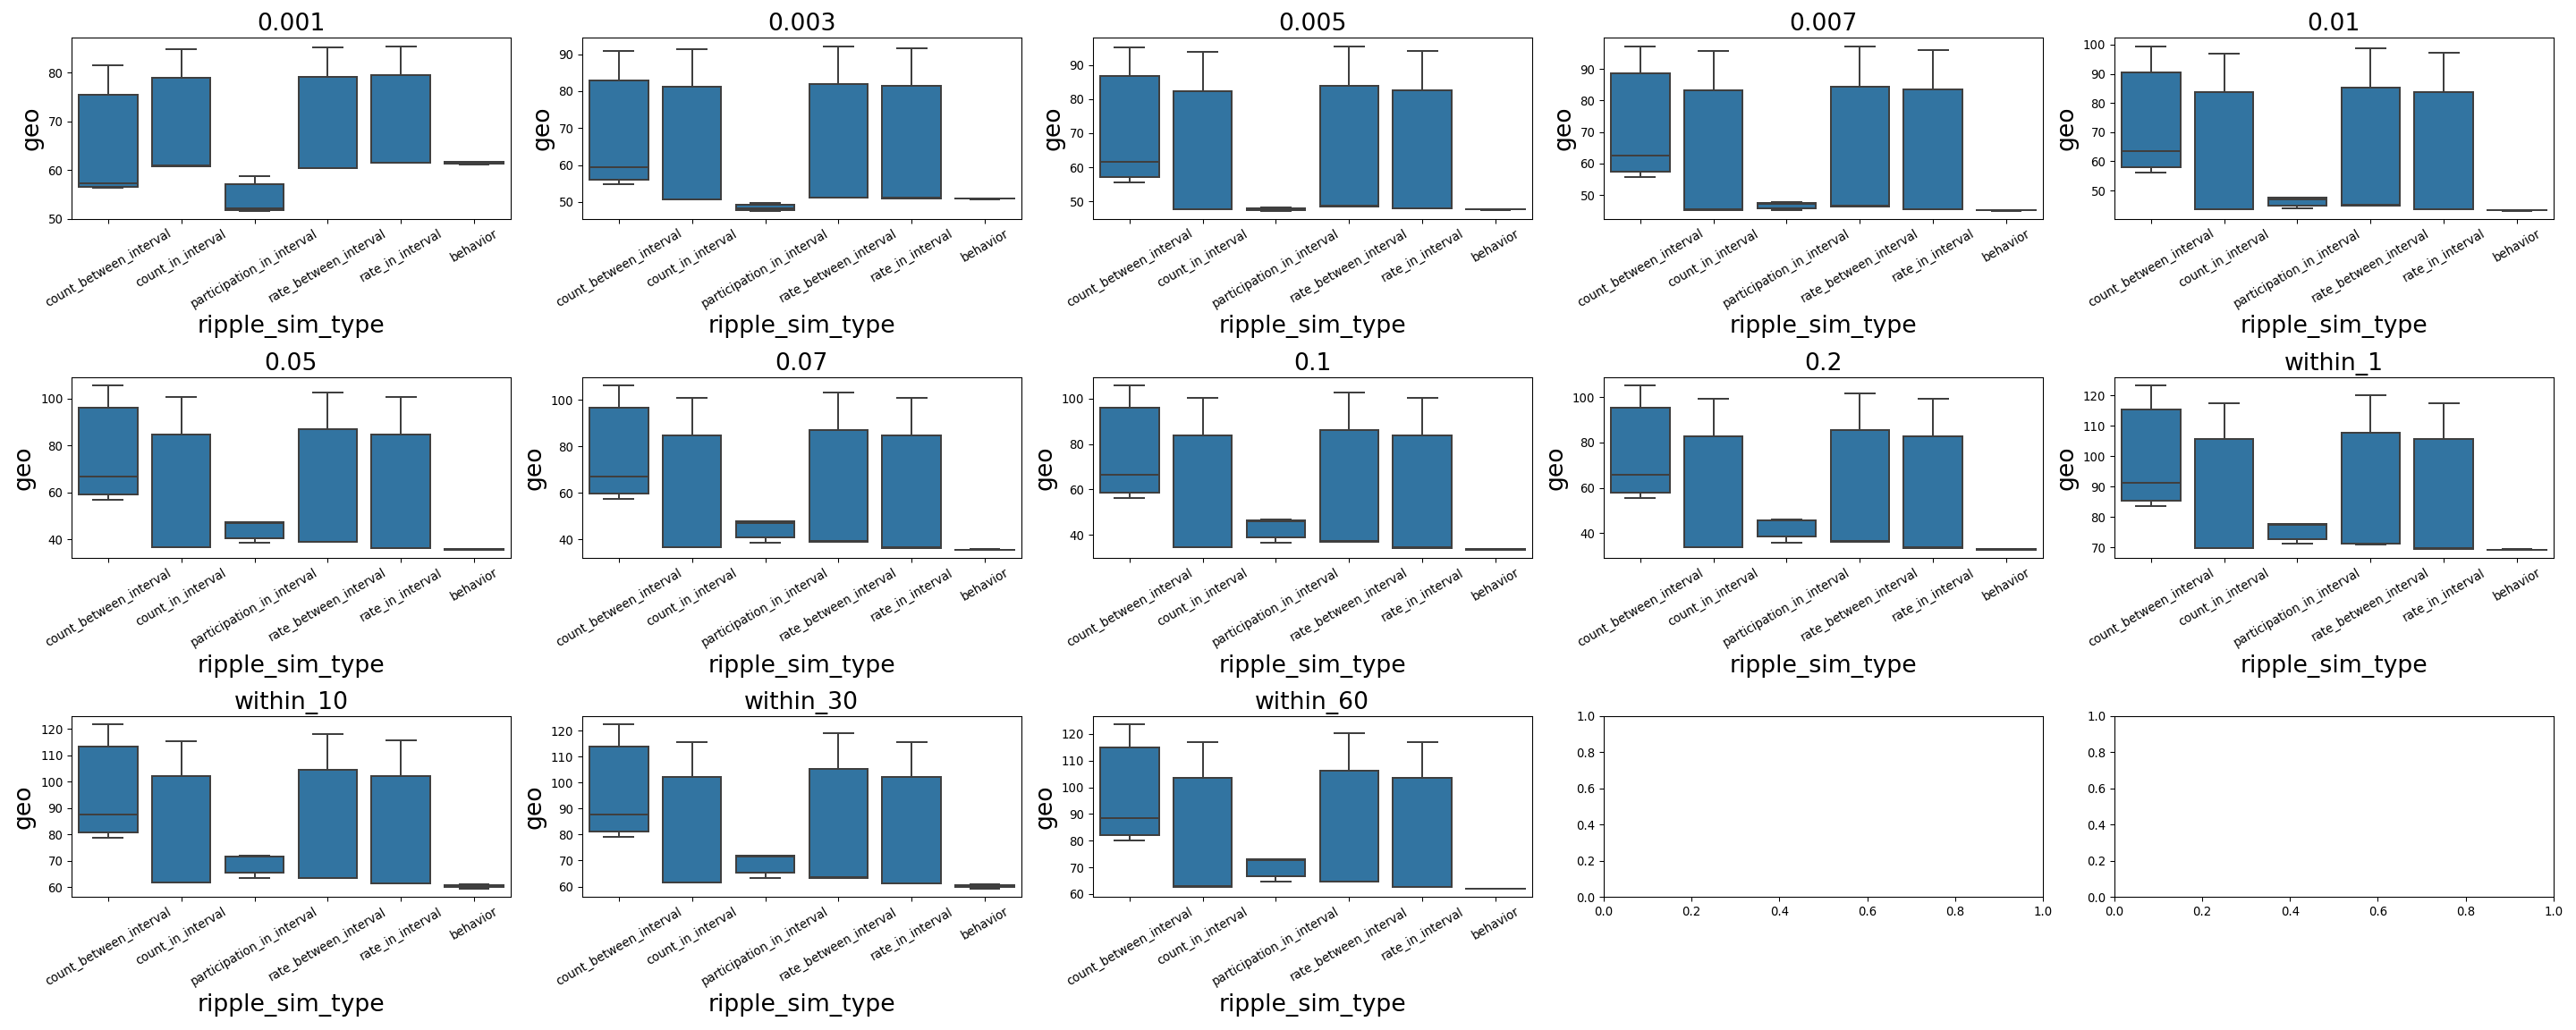

In [34]:
%matplotlib notebook
nplots = sw_label_distance_df['sw_sim_type'].nunique()
fig,axs = ph.subplots_wrapper(nplots)
for ii,(key,val) in enumerate(sw_label_distance_df.groupby('sw_sim_type')):
    ax = axs.ravel()[ii]
    ax=sns.boxplot(data=val,x='ripple_sim_type',y='geo',color='C0',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(key)
plt.tight_layout()

# SHUFFLE test!!!!

In [13]:
nrepeats=1000
task_ind=0

test_res = cpacas.sweep_test_coswitch_wrapper(data_dir_full,
                                pf_res_save_fn='place_field_avg_and_trial_vthresh.p',
                                pf_shuffle_fn = 'fr_map_null_trialtype_vthresh.p',
                                speed_key='v',fr_key='fr_peak',
                                bin_size=2.2,
                                switch_res_query=(slice(None),0.3,'switch_magnitude',0.4),
                                nrepeats_sw = nrepeats,
                                edges = None,
                                save_fn = 'switch_res_window.p',
                                load_only=True,
                                dosave=False,force_reload=False,
                                task_ind = task_ind,
                                prep_force_reload=False,
                                )



changes_df_combined_d=test_res['changes_df_combined_d']
index_within_to_trial_index_df = dpp.index_within_to_trial_index(spk_beh_df)
pos_to_time_func_per_trial = test_res['pos_to_time_func_per_trial']
pf_loc_combined = test_res['pf_loc_combined']
all_sw_times_v_combined_shuffle_l = test_res['all_sw_times_v_combined_shuffle_l']

# all_sw_times_v_combined_shuffle_l = cpacas.shuffle_changes_df_combined_get_sw_times_v_combined_shuffle(changes_df_combined_d,index_within_to_trial_index_df,pos_to_time_func_per_trial,pf_loc_combined,nrepeats=nrepeats,task_ind=task_ind)



/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/switch_res_window.p exists; loading---


### all_sw_times_v shuffle into sw_sim 

In [14]:
%%time
sw_sim_allonoff_shuffle = []
for ii,allsw in enumerate(all_sw_times_v_combined_shuffle_l[:200]):
    ss, td=pwa.get_sw_sim(allsw,win_l=[1,10,30,60],decay_rate_l=[0.003,0.007,0.01,0.05,0.1])
#     sw_sim_allonoff_shuffle[ii]=sw_sim_allonoff
    sw_sim_allonoff_shuffle.append(ss)

# sw_sim_allonoff_shuffle_df = pd.concat(sw_sim_allonoff_shuffle,axis=1)
    

CPU times: user 31 s, sys: 1.43 s, total: 32.4 s
Wall time: 32.4 s


In [23]:
label_sim_all_d.keys()

dict_keys([('extended', 'count_between_interval', 0), ('extended', 'count_between_interval', 1), ('extended', 'count_between_interval', 2), ('extended', 'count_in_interval', 0), ('extended', 'count_in_interval', 1), ('extended', 'count_in_interval', 2), ('extended', 'participation_in_interval', 0), ('extended', 'participation_in_interval', 1), ('extended', 'participation_in_interval', 2), ('extended', 'rate_between_interval', 0), ('extended', 'rate_between_interval', 1), ('extended', 'rate_between_interval', 2), ('extended', 'rate_in_interval', 0), ('extended', 'rate_in_interval', 1), ('extended', 'rate_in_interval', 2), ('ripple_only', 'count_between_interval', 0), ('ripple_only', 'count_between_interval', 1), ('ripple_only', 'count_between_interval', 2), ('ripple_only', 'count_in_interval', 0), ('ripple_only', 'count_in_interval', 1), ('ripple_only', 'count_in_interval', 2), ('ripple_only', 'participation_in_interval', 0), ('ripple_only', 'participation_in_interval', 1), ('ripple_onl

In [69]:
# test one shuffle
sw_sim_key = 0.007#'within_10'
sw_shuffle_one = sw_sim_allonoff_shuffle[5].loc[1].loc[sw_sim_key].dropna(axis=1)
sw_sim_one = sw_sim_allonoff.loc[1,sw_sim_key].dropna(axis=1)

# label_sim_one = label_sim_all_d[kk_l[1]].dropna(axis=1,how='all').dropna(axis=0,how='all').loc[kk_l[1]]
# kk =('ripple_only','participation_in_interval',2)
kk =('ripple_only','count_in_interval',2)
label_sim_one = label_sim_all_d[kk].dropna(axis=1,how='all').dropna(axis=0,how='all').loc[kk]

/tmp/ipykernel_1100668/2118435206.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  sw_sim_one = sw_sim_allonoff.loc[1,sw_sim_key].dropna(axis=1)


In [126]:
def svd_dot(a,b,rank=None,do_divide=False,norm_s=False):
    a = a.dropna(axis=0,how='all').dropna(axis=1,how='all')
    b = b.dropna(axis=0,how='all').dropna(axis=1,how='all')
    common_inds = a.index.intersection(b.index)
    a = a.loc[common_inds,common_inds]
    b = b.loc[common_inds,common_inds]
    
    ua,sa,_ = scipy.linalg.svd(a)
    ub,sb,_ = scipy.linalg.svd(b)
    
    if norm_s:
        sa = sa / np.linalg.norm(sa)
        sb = sb / np.linalg.norm(sb)
    
    if do_divide:
        ua = ua / sa[None,:]
        ub = ub * sb[None,:]
    if rank is not None:
        dot = ua[:,:rank].T.dot(ub[:,:rank])
    else:
        dot = ua.T.dot(ub)
        rank = a.shape[0]
    
    _,s,_ = np.linalg.svd(dot)
    res=np.sum(np.log(s[:rank])**2)
    
    return res#dot

In [99]:
label_sim_one_scaled = label_sim_one * 0.01

In [161]:
rank = 5
do_divide = True#False#True
norm_s = True
label_dot_sim = svd_dot(label_sim_one,sw_sim_one,rank=rank,do_divide=do_divide,norm_s=norm_s)
label_dot_shuffle = svd_dot(label_sim_one,sw_shuffle_one,rank=rank,do_divide=do_divide,norm_s=norm_s)


label_sc_dot_sim = svd_dot(label_sim_one_scaled,sw_sim_one,rank=rank,do_divide=do_divide,norm_s=norm_s)
label_sc_dot_shuffle = svd_dot(label_sim_one_scaled,sw_shuffle_one,rank=rank,do_divide=do_divide,norm_s=norm_s)
label_dot_label_sc = svd_dot(label_sim_one,label_sim_one_scaled,rank=rank,do_divide=do_divide,norm_s=norm_s)

In [162]:
np.linalg.norm(label_dot_sim)
# np.trace(label_dot_sim)

45.17479914095401

In [163]:
np.linalg.norm(label_dot_shuffle)
# np.trace(label_dot_shuffle)

70.46536965950567

In [164]:
np.linalg.norm(label_dot_label_sc)

2.2803010541544855e-30

In [118]:
reload(pwa)

<module 'pairwise_analysis' from '/mnt/home/szheng/projects/util_code/pairwise_analysis.py'>

In [121]:
norm_s=True
print(pwa.geodesic_distance(sw_shuffle_one,sw_sim_one,norm_s=norm_s))
print(pwa.geodesic_distance(sw_shuffle_one,label_sim_one,norm_s=norm_s))
print(pwa.geodesic_distance(label_sim_one_scaled,label_sim_one,norm_s=norm_s))

55.41819032204041
53.43109061432772
2.1908900975107895e-07


Text(0.5, 1.0, 'eigen-spectrum of similarity matrix\n0.007')

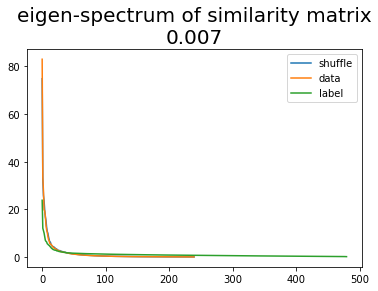

In [584]:
%matplotlib inline
plt.plot(scipy.linalg.svd(sw_shuffle_one)[1],label='shuffle')
plt.plot(scipy.linalg.svd(sw_sim_one)[1],label='data')
plt.plot(scipy.linalg.svd(label_sim_one)[1],label='label')

plt.legend()
plt.title(f'eigen-spectrum of similarity matrix\n{sw_sim_key}')

In [68]:
# onoff = 1
# sw_sim_key = 0.01
# sw_sim_one_shuffle = [v.loc[onoff,sw_sim_key] for v in sw_sim_allonoff_shuffle.values()]

/tmp/ipykernel_3110389/403097012.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  sw_sim_one_shuffle = [v.loc[onoff,sw_sim_key] for v in sw_sim_allonoff_shuffle.values()]


In [82]:
# # label_sim = beh_corr_all.loc[0,'both']
# kk=('count_in_interval',0)
# label_sim = ripple_sim_d.loc['ripple_only'].loc[kk]

/tmp/ipykernel_3110389/4029186045.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim = ripple_sim_d.loc['ripple_only'].loc[kk]


In [74]:
# %%time
# d_shuffle = []
# for sw_shuffle_one in sw_sim_one_shuffle[:100]:
#     d = pwa.geodesic_distance(label_sim,sw_shuffle_one)
#     d_shuffle.append(d)

CPU times: user 12 s, sys: 10 s, total: 22.1 s
Wall time: 5.53 s


In [560]:
%%time
reload(pwa)
label_sim_all_d=dict(label_sim_all) 
kk_l = [('count_in_interval',0),('count_in_interval',2),(task_ind,'both')]
label_sim_all_sub = [(kk,label_sim_all_d[kk]) for kk in kk_l]

sw_label_dist_shuffle_l = []
for ii, sw_sim_sh in enumerate(sw_sim_allonoff_shuffle):
    sw_label_dist_shuffle = pwa.get_sw_label_distance(sw_sim_sh,label_sim_all_sub)
    sw_label_dist_shuffle_l.append(sw_label_dist_shuffle)

CPU times: user 57min 51s, sys: 48min 46s, total: 1h 46min 37s
Wall time: 26min 39s


In [561]:
fn = os.path.join(data_dir_full,'py_data','switch_analysis','sw_label_dist_shuffle_geo.p')
pickle.dump(sw_label_dist_shuffle_l,open(fn,'wb'))

#### combine data distance with shuffle ci

In [585]:
sw_label_dist_shuffle_d = {k:val for k,val in enumerate(sw_label_dist_shuffle_l)}

sw_label_dist_shuffle_df= pd.concat(sw_label_dist_shuffle_d,axis=0)

one_group=list(sw_label_dist_shuffle_df.groupby(level=(0)))[0][1].droplevel(0)
extra_cols = [col for col in one_group.columns if col not in ['geo','corr']]
one_group_extra_cols = one_group[extra_cols]

ci = 0.95
ci_up,ci_low = (1-ci)/2+ci, (1-ci)/2
ci_up_df = sw_label_dist_shuffle_df.groupby(level=(1,2))[['geo','corr']].quantile(ci_up)
ci_up_df.columns = ['geo_up','corr_up']
ci_low_df = sw_label_dist_shuffle_df.groupby(level=(1,2))[['geo','corr']].quantile(ci_low)
ci_low_df.columns = ['geo_low','corr_low']

ci_df = pd.concat([ci_low_df,ci_up_df,one_group_extra_cols],axis=1)

sw_label_distance_df_onoff_ci = pd.merge(ci_df.reset_index(level=0).fillna('nan'),sw_label_distance_df_onoff.reset_index(level=0).fillna('nan'),on=['level_0',*extra_cols],how='left')
sw_label_distance_df_onoff_ci = sw_label_distance_df_onoff_ci.set_index('level_0',append=True).swaplevel(0,1)



In [590]:
sw_label_distance_df_onoff.loc[-1].sort_values('corr')

geo      corr sw_sim_type         ripple_sim_type  epoch  \
95   29.147951  0.846137    within_1                     NaN    NaN   
79   29.791235  0.887686         0.1                     NaN    NaN   
1    40.094740  0.897380       0.003  count_between_interval    1.0   
17   41.133955  0.905436       0.007  count_between_interval    1.0   
63   32.600632  0.907109        0.05                     NaN    NaN   
..         ...       ...         ...                     ...    ...   
73   31.995889  1.011943         0.1   rate_between_interval    0.0   
76   29.305665  1.012354         0.1        rate_in_interval    0.0   
89   30.484169  1.013137    within_1   rate_between_interval    0.0   
60   31.953904  1.013864        0.05        rate_in_interval    0.0   
124  31.650838  1.017053   within_30        rate_in_interval    0.0   

     task_index trialtype_index  
95          0.0            both  
79          0.0            both  
1           NaN             NaN  
17          NaN             NaN  
63          0.0            both  
..          ...             ...  
73          NaN             NaN  
76          NaN             NaN  
89          NaN             NaN  
60          NaN             NaN  
124         NaN             NaN  

[144 rows x 7 columns]

In [586]:
sw_label_distance_df_onoff.loc[-1].set_index(extra_cols).loc['within_1']

geo  \
ripple_sim_type           epoch task_index trialtype_index              
count_between_interval    0.0   NaN        NaN              45.759670   
                          1.0   NaN        NaN              40.293967   
                          2.0   NaN        NaN              38.888315   
count_in_interval         0.0   NaN        NaN              25.188404   
                          1.0   NaN        NaN              25.370543   
                          2.0   NaN        NaN              29.122197   
participation_in_interval 0.0   NaN        NaN              29.570710   
                          1.0   NaN        NaN              26.594479   
                          2.0   NaN        NaN              32.351254   
rate_between_interval     0.0   NaN        NaN              30.484169   
                          1.0   NaN        NaN              29.110357   
                          2.0   NaN        NaN              26.608797   
rate_in_interval          0.0   NaN        NaN              25.009930   
                          1.0   NaN        NaN              26.566454   
                          2.0   NaN        NaN              25.473962   
NaN                       NaN   0.0        both             29.147951   

                                                                corr  
ripple_sim_type           epoch task_index trialtype_index            
count_between_interval    0.0   NaN        NaN              0.998601  
                          1.0   NaN        NaN              0.961725  
                          2.0   NaN        NaN              0.994628  
count_in_interval         0.0   NaN        NaN              1.003995  
                          1.0   NaN        NaN              0.973291  
                          2.0   NaN        NaN              0.970924  
participation_in_interval 0.0   NaN        NaN              1.010955  
                          1.0   NaN        NaN              0.986147  
                          2.0   NaN        NaN              0.999293  
rate_between_interval     0.0   NaN        NaN              1.013137  
                          1.0   NaN        NaN              0.985995  
                          2.0   NaN        NaN              0.964263  
rate_in_interval          0.0   NaN        NaN              1.004669  
                          1.0   NaN        NaN              0.978379  
                          2.0   NaN        NaN              0.975290  
NaN                       NaN   0.0        both             0.846137

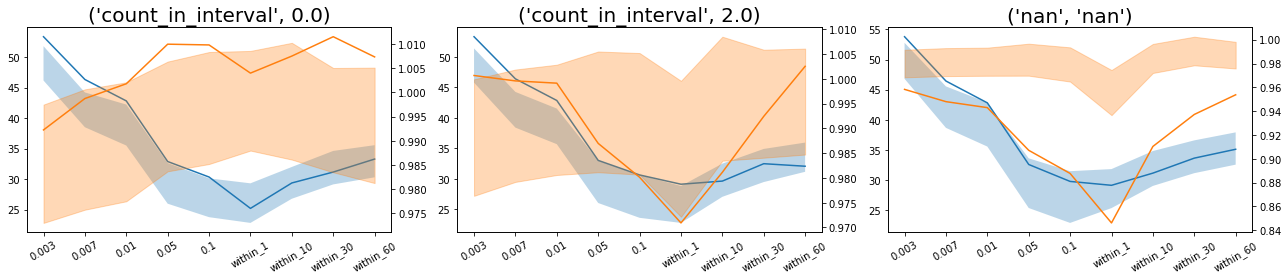

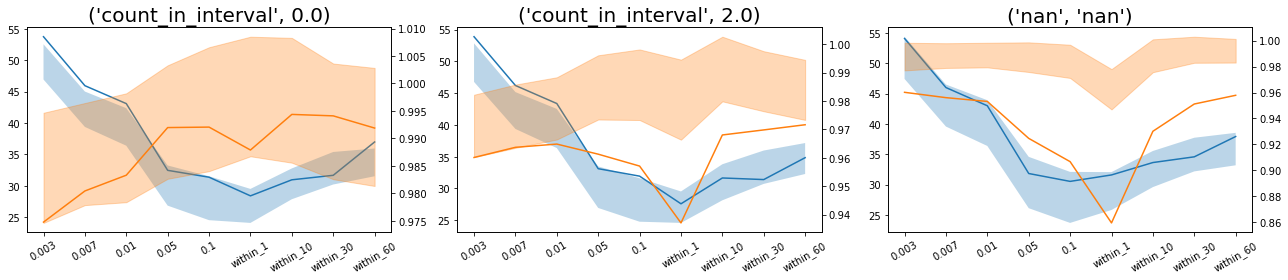

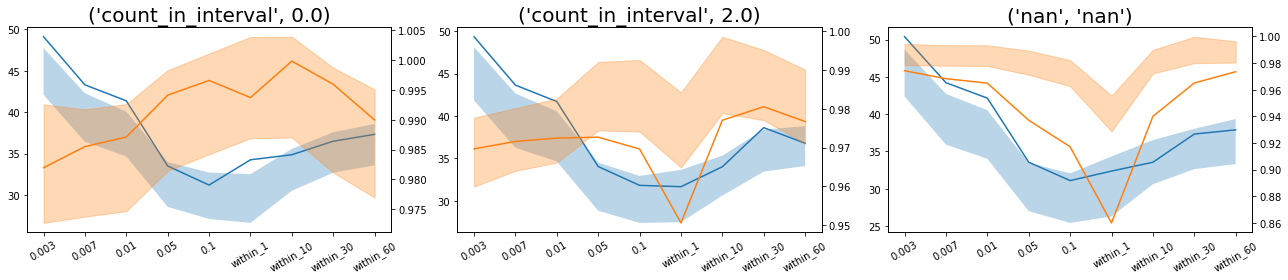

In [591]:
onoff_str_d={1: 'on', -1: 'off', 'both': 'both'}

onoff_gpb=sw_label_distance_df_onoff_ci.groupby(level=0)
for onoff,val in onoff_gpb:
    onoff_str = onoff_str_d[onoff]
    gpb = val.loc[onoff].groupby(['ripple_sim_type','epoch'])
    nplots = len(gpb)
    fig,axs = ph.subplots_wrapper(nplots)
    for ii,(typ, valval) in enumerate(gpb):
        ax = axs.ravel()[ii]
        xticklabels = valval['sw_sim_type'].values
        xs = np.arange(len(xticklabels))
        ax.fill_between(xs,valval['geo_low'].values,valval['geo_up'].values,alpha=0.3)
        ax.plot(xs,valval['geo'].values,label='geo')
        ax.set_xticks(xs)
        ax.set_xticklabels(xticklabels,rotation=30)
        ax.set_title(typ)
        ax2 = ax.twinx()
        ax2.fill_between(xs,valval['corr_low'].values,valval['corr_up'].values,color='C1',alpha=0.3)
        ax2.plot(xs,valval['corr'].values,label='corr',color='C1')
    plt.tight_layout()
    fn = os.path.join(data_dir_full,'py_figures','switch_analysis',f'switch_label_distance_with_shuffle_{onoff_str}.pdf')
    fig.savefig(fn,bbox_inches='tight')

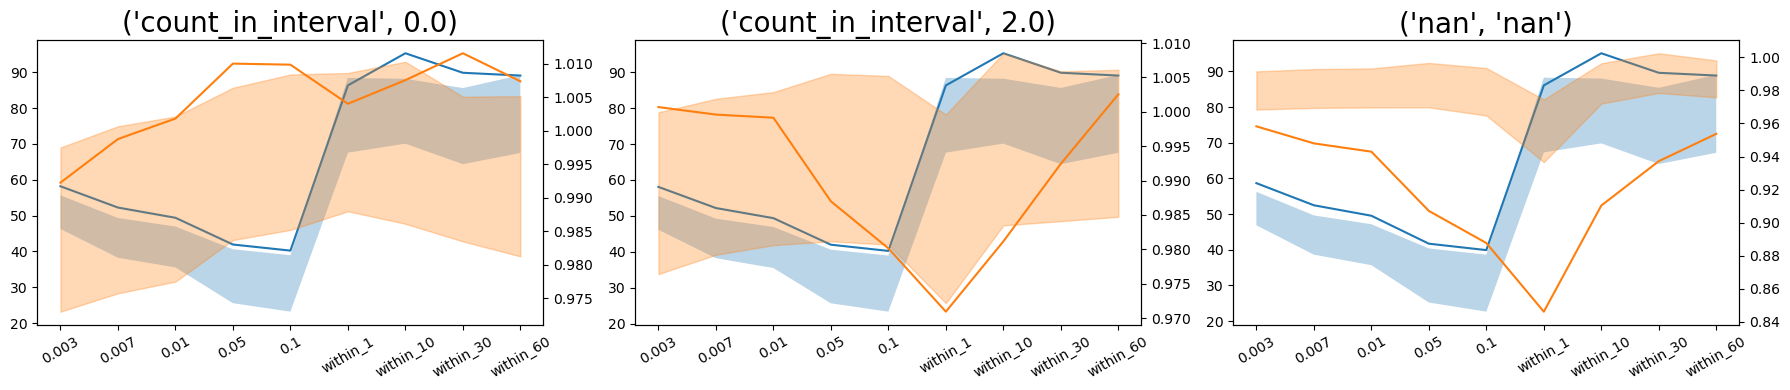

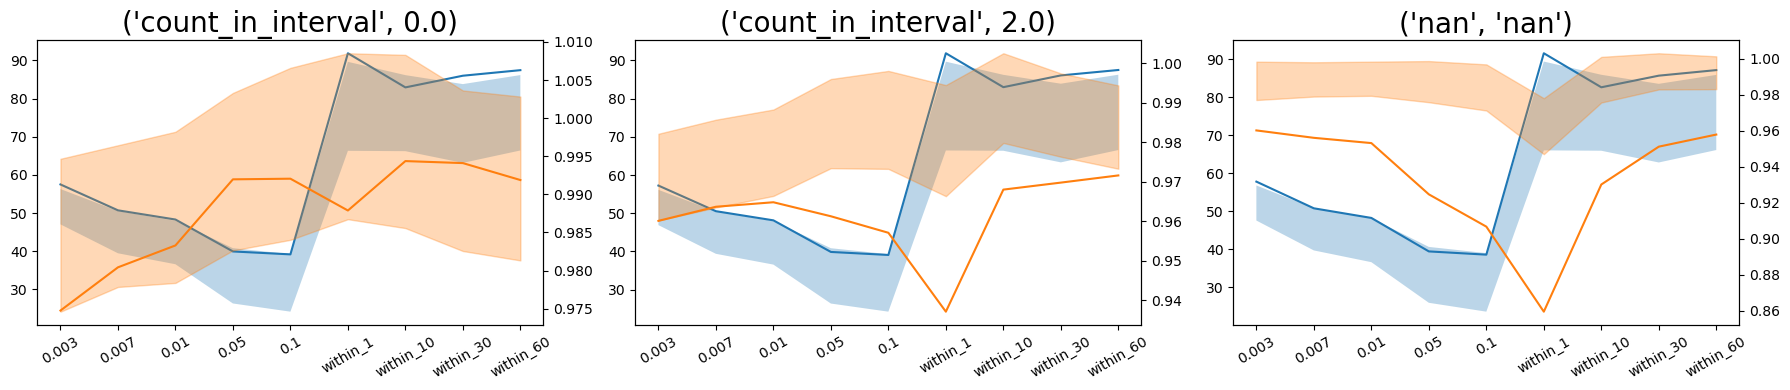

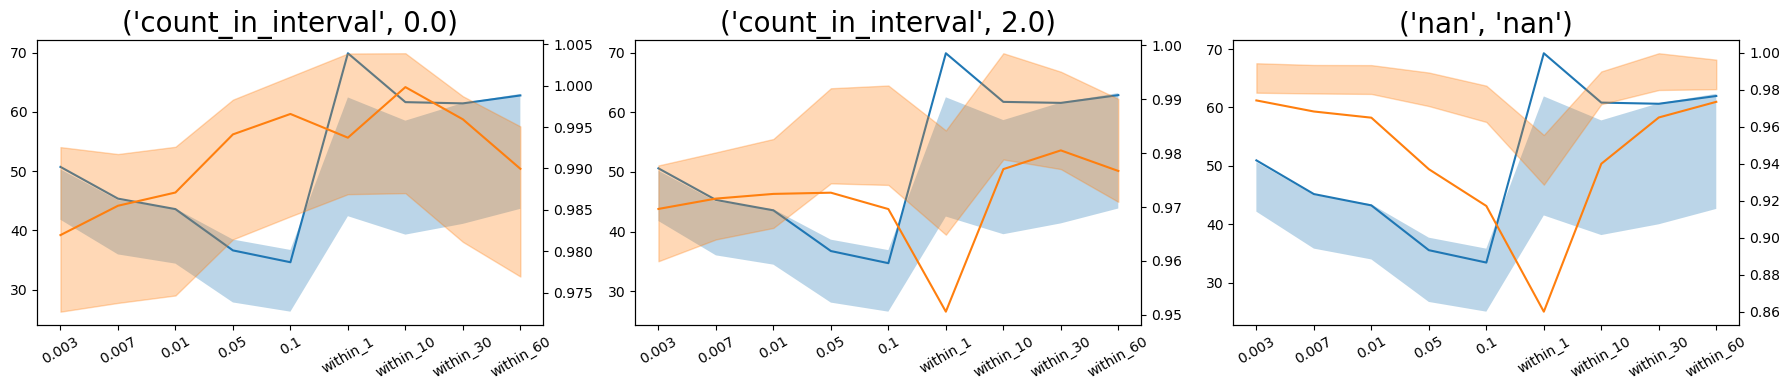

In [338]:
onoff_gpb=sw_label_distance_df_onoff_ci.groupby(level=0)
for onoff,val in onoff_gpb:
    onoff_str = onoff_str_d[onoff]
    gpb = val.loc[onoff].groupby(['ripple_sim_type','epoch'])
    nplots = len(gpb)
    fig,axs = ph.subplots_wrapper(nplots)
    for ii,(typ, valval) in enumerate(gpb):
        ax = axs.ravel()[ii]
        xticklabels = valval['sw_sim_type'].values
        xs = np.arange(len(xticklabels))
        ax.fill_between(xs,valval['geo_low'].values,valval['geo_up'].values,alpha=0.3)
        ax.plot(xs,valval['geo'].values,label='geo')
        ax.set_xticks(xs)
        ax.set_xticklabels(xticklabels,rotation=30)
        ax.set_title(typ)
        ax2 = ax.twinx()
        ax2.fill_between(xs,valval['corr_low'].values,valval['corr_up'].values,color='C1',alpha=0.3)
        ax2.plot(xs,valval['corr'].values,label='corr',color='C1')
    plt.tight_layout()
    fn = os.path.join(data_dir_full,'py_figures','switch_analysis',f'switch_label_distance_with_shuffle_{onoff_str}.pdf')
    fig.savefig(fn,bbox_inches='tight')

In [344]:

sw_sim_allonoff.loc[1].loc[0.1].dropna(axis=1)

3.0           29.0          30.0          31.0          32.0   \
3.0    1.000000e+00  3.741016e-07  1.261646e-07  3.155978e-02  2.135165e-05   
29.0   3.741016e-07  1.000000e+00  2.965613e-40  7.448055e-32  5.018897e-38   
30.0   1.261646e-07  2.965613e-40  1.000000e+00  3.981728e-09  5.908894e-03   
31.0   3.155978e-02  7.448055e-32  3.981728e-09  1.000000e+00  6.738533e-07   
32.0   2.135165e-05  5.018897e-38  5.908894e-03  6.738533e-07  1.000000e+00   
...             ...           ...           ...           ...           ...   
463.0  2.110428e-10  1.113798e-23  4.580151e-04  6.687081e-09  4.506112e-15   
465.0  1.711399e-51  4.022799e-84  2.838698e-24  5.401139e-53  8.015304e-47   
466.0  3.060880e-25  7.194873e-58  1.969636e-03  9.660070e-27  1.433557e-20   
468.0  6.784781e-57  1.594824e-89  1.125392e-29  2.141262e-58  3.177638e-52   
480.0  1.457318e-49  3.425558e-82  2.417254e-22  4.599265e-51  6.825320e-45   

              34.0          35.0          36.0          37.0          38.0   \
3.0    1.005136e-35  1.200286e-52  9.182161e-10  4.839603e-29  8.074671e-59   
29.0   2.362664e-68  2.821380e-85  2.559953e-24  1.137592e-61  1.898024e-91   
30.0   1.667220e-08  1.990914e-25  4.703963e-04  8.027449e-02  1.339346e-31   
31.0   3.172189e-37  3.788076e-54  2.909450e-08  1.527368e-30  2.548349e-60   
32.0   4.707536e-31  5.621515e-48  1.960543e-14  2.266618e-24  3.781756e-54   
...             ...           ...           ...           ...           ...   
463.0  3.640097e-05  2.256717e-11  9.736793e-01  5.705612e-03  1.518159e-17   
465.0  1.702654e-16  7.013477e-02  6.034695e-21  9.883995e-01  2.583763e-02   
466.0  3.283816e-11  3.921376e-28  9.265094e-07  1.581115e-04  2.638023e-34   
468.0  6.750109e-22  5.751440e-02  2.392433e-26  4.010993e-06  1.190115e-02   
480.0  1.449871e-14  8.236266e-04  5.138760e-19  1.160725e-02  5.540774e-10   

       ...         454.0         455.0         456.0         459.0  \
3.0    ...  1.664472e-13  1.211065e-34  1.287985e-04  7.953066e-09   
29.0   ...  1.412214e-20  2.846717e-67  7.961378e-22  2.975255e-15   
30.0   ...  1.633617e-02  2.008793e-07  9.795506e-04  9.967593e-26   
31.0   ...  5.274028e-12  3.822094e-36  4.064852e-06  2.503334e-17   
32.0   ...  1.043295e-12  5.671996e-30  1.657756e-01  1.686880e-23   
...    ...           ...           ...           ...           ...   
463.0  ...  7.886891e-04  4.385866e-04  2.279319e-01  3.743537e-09   
465.0  ...  2.716272e-02  1.413136e-17  1.328742e-47  1.352085e-69   
466.0  ...  1.374066e-08  3.956590e-10  2.376488e-21  2.418238e-43   
468.0  ...  1.251150e-02  5.602328e-23  5.267750e-53  5.360293e-75   
480.0  ...  5.824934e-10  1.203336e-15  1.131472e-45  1.151349e-67   

              462.0         463.0         465.0         466.0         468.0  \
3.0    1.259143e-11  2.110428e-10  1.711399e-51  3.060880e-25  6.784781e-57   
29.0   2.959728e-44  1.113798e-23  4.022799e-84  7.194873e-58  1.594824e-89   
30.0   1.082963e-04  4.580151e-04  2.838698e-24  1.969636e-03  1.125392e-29   
31.0   3.973827e-13  6.687081e-09  5.401139e-53  9.660070e-27  2.141262e-58   
32.0   5.897168e-07  4.506112e-15  8.015304e-47  1.433557e-20  3.177638e-52   
...             ...           ...           ...           ...           ...   
463.0  2.192992e-20  1.000000e+00  3.217686e-10  9.021230e-07  1.275640e-15   
465.0  1.359178e-40  3.217686e-10  1.000000e+00  5.591201e-27  4.606132e-01   
466.0  2.430924e-14  9.021230e-07  5.591201e-27  1.000000e+00  2.216611e-32   
468.0  5.388413e-46  1.275640e-15  4.606132e-01  2.216611e-32  1.000000e+00   
480.0  1.157389e-38  2.739976e-08  1.174348e-02  4.761109e-25  4.655662e-08   

              480.0  
3.0    1.457318e-49  
29.0   3.425558e-82  
30.0   2.417254e-22  
31.0   4.599265e-51  
32.0   6.825320e-45  
...             ...  
463.0  2.739976e-08  
465.0  1.174348e-02  
466.0  4.761109e-25  
468.0  4.655662e-08  
480.0  1.000000e+00  

[240 rows x 240 columns]

In [474]:
reload(pwa)
pwa.geodesic_distance(sw_sim_allonoff_shuffle[0].loc[1].loc[0.01].dropna(axis=1),sw_sim_allonoff_shuffle[0].loc[1].loc[0.1].dropna(axis=1))




28.895812149513187

In [469]:
reload(pwa)
pwa.geodesic_distance(aa,aa,epsilon=1e-10)

1.545967873256891e-09

In [86]:
# # geo_data=sw_label_distance_df_onoff.loc[onoff].set_index(['sw_sim_type','task_index','trialtype_index']).loc[sw_sim_key,0,'both']['geo'].iloc[0]
# geo_data=sw_label_distance_df_onoff.loc[onoff].set_index(['sw_sim_type','ripple_sim_type','epoch']).loc[(sw_sim_key,*kk),:]['geo']




(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

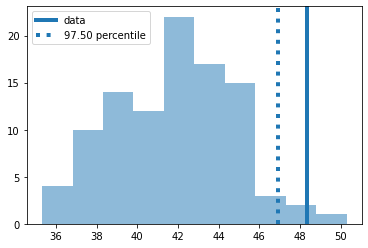

In [87]:
ph.plot_shuffle_data_dist_with_thresh(d_shuffle,geo_data) 

/tmp/ipykernel_3110389/2629478827.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  dist=sw_sim_allonoff.loc[1,'within_1'].dropna(axis=1)


<AxesSubplot:>

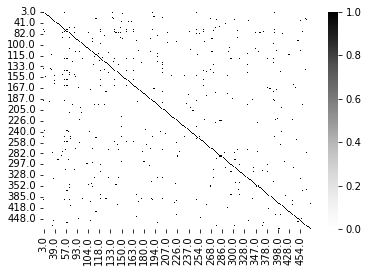

In [57]:
dist=sw_sim_allonoff.loc[1,'within_1'].dropna(axis=1)
sns.heatmap(dist,cmap='Greys')

<AxesSubplot:>

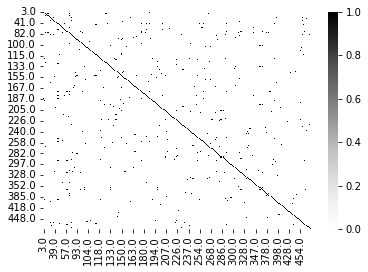

In [51]:
dist_shuffle=sw_sim_allonoff_shuffle[0].loc[1].loc['within_1'].dropna(axis=1)
sns.heatmap(dist_shuffle,cmap='Greys')

In [ ]:
# baseline: use place field overlap

In [135]:
reload(pwa)

<module 'pairwise_analysis' from '/mnt/home/szheng/projects/util_code/pairwise_analysis.py'>

In [136]:
overlap_ratio = pwa.get_field_overlap_pair(pf_all_field_combined)

/mnt/home/szheng/projects/util_code/pairwise_analysis.py:106: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,0] = np.tile(uid[:,None],[1,n_field])
/mnt/home/szheng/projects/util_code/pairwise_analysis.py:107: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ind_pair_tensor[:,:,1] = np.tile(uid[None,:],[n_field,1])


In [141]:
(overlap_ratio > 0.5).astype(float)

3.0    27.0   29.0   30.0   31.0   32.0   33.0   34.0   35.0   36.0   \
3.0      1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    0.0    1.0   
27.0     0.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    1.0   
29.0     1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
30.0     0.0    1.0    1.0    1.0    0.0    1.0    0.0    1.0    1.0    0.0   
31.0     0.0    0.0    1.0    0.0    1.0    1.0    0.0    0.0    1.0    1.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
468.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0    0.0    1.0    1.0   
474.0    0.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0    1.0   
475.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
476.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
480.0    0.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0    1.0   

       ...  459.0  462.0  463.0  465.0  466.0  468.0  474.0  475.0  476.0  \
3.0    ...    0.0    0.0    0.0    1.0    0.0    0.0    0.0    1.0    1.0   
27.0   ...    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
29.0   ...    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0    1.0   
30.0   ...    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
31.0   ...    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
468.0  ...    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   
474.0  ...    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    0.0   
475.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
476.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
480.0  ...    1.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

       480.0  
3.0      0.0  
27.0     0.0  
29.0     1.0  
30.0     0.0  
31.0     1.0  
...      ...  
468.0    1.0  
474.0    1.0  
475.0    0.0  
476.0    0.0  
480.0    1.0  

[321 rows x 321 columns]

In [142]:
pwa.geodesic_distance(label_sim,overlap_ratio)

overlap_morethan = (overlap_ratio > 0.5).astype(float)
pwa.geodesic_distance(label_sim,overlap_morethan)

78.53964637268636

# a simpler way to look at pairwise switch simimlarity and pairwise ripple similarity

In [18]:
label_sim_all_d=dict(label_sim_all)


kk_l = [('count_in_interval',0),('count_in_interval',2),(task_ind,'both')]

<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: PerformanceWarning: indexing past lexsort depth may impact performance.
<timed exec>:13: Perf

CPU times: user 1min 18s, sys: 5.35 s, total: 1min 23s
Wall time: 1min 14s


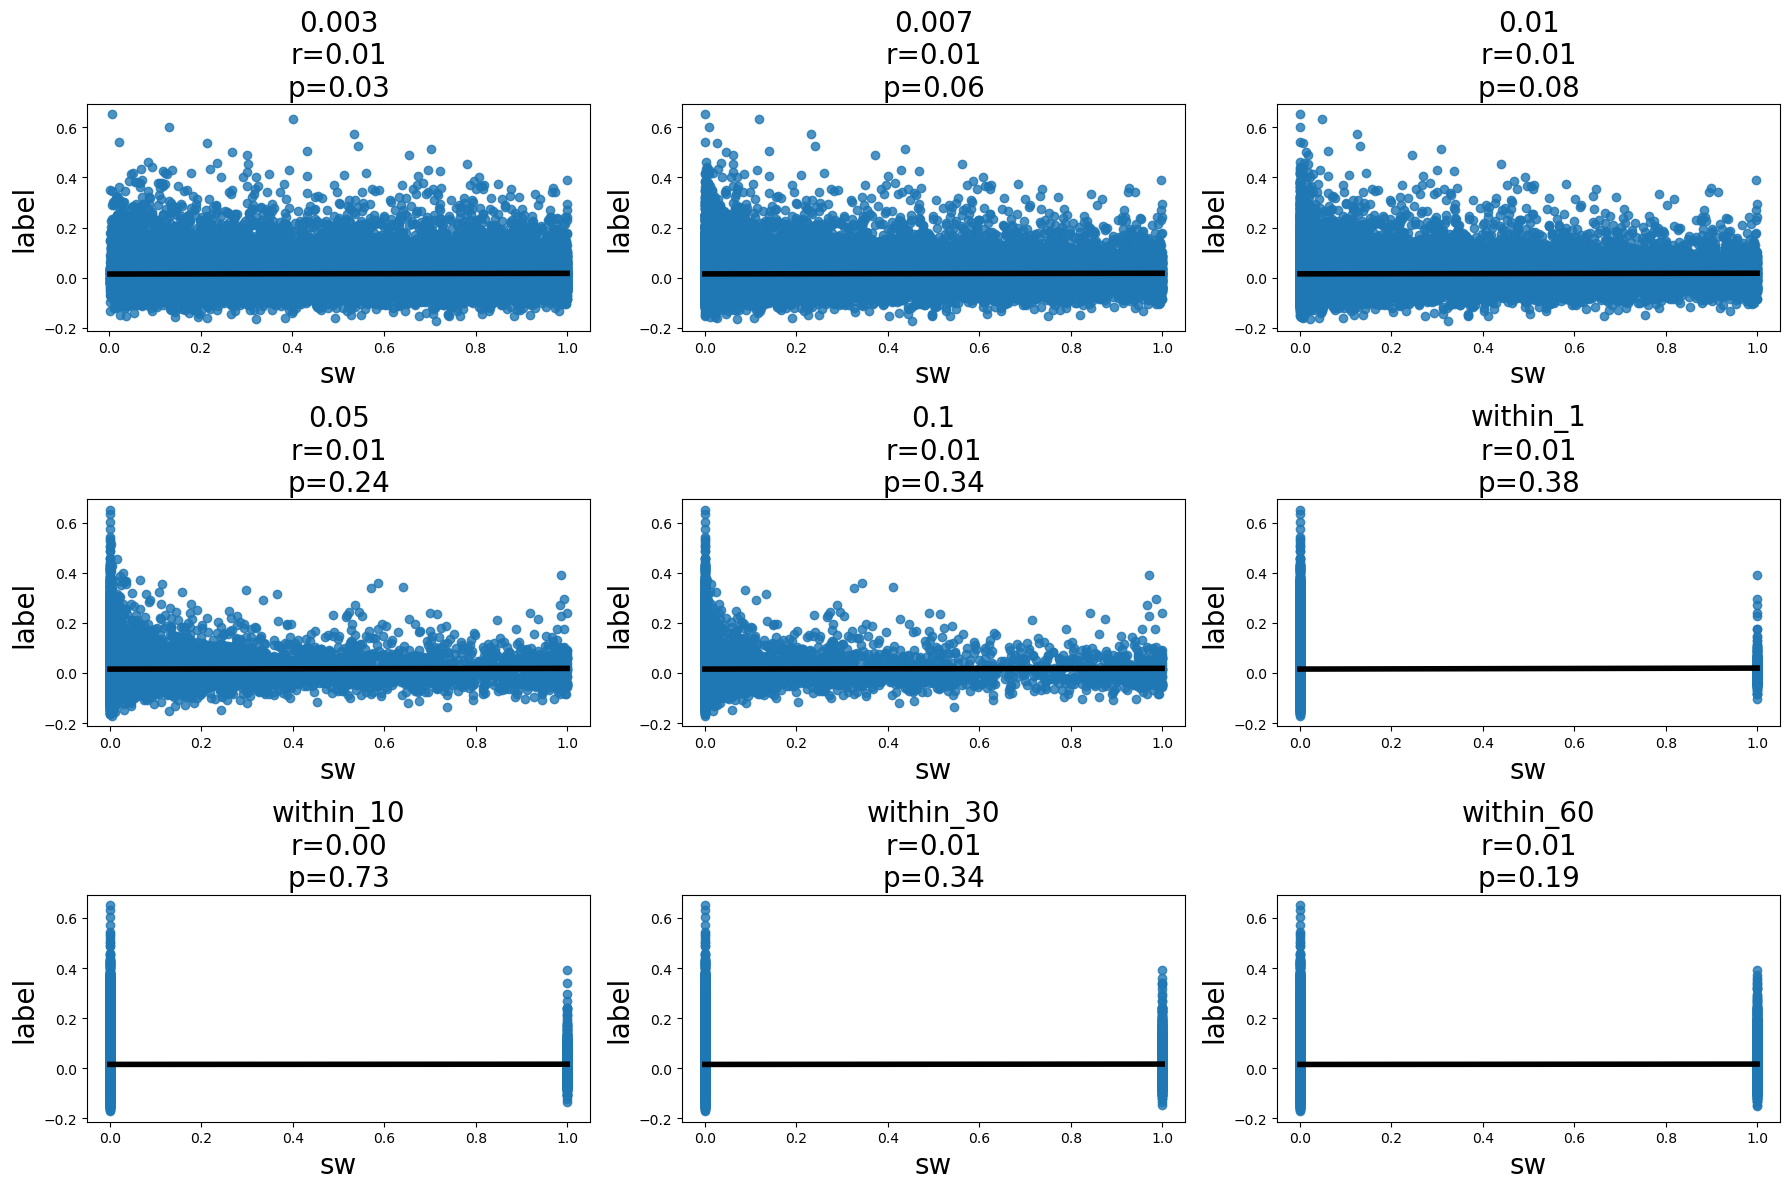

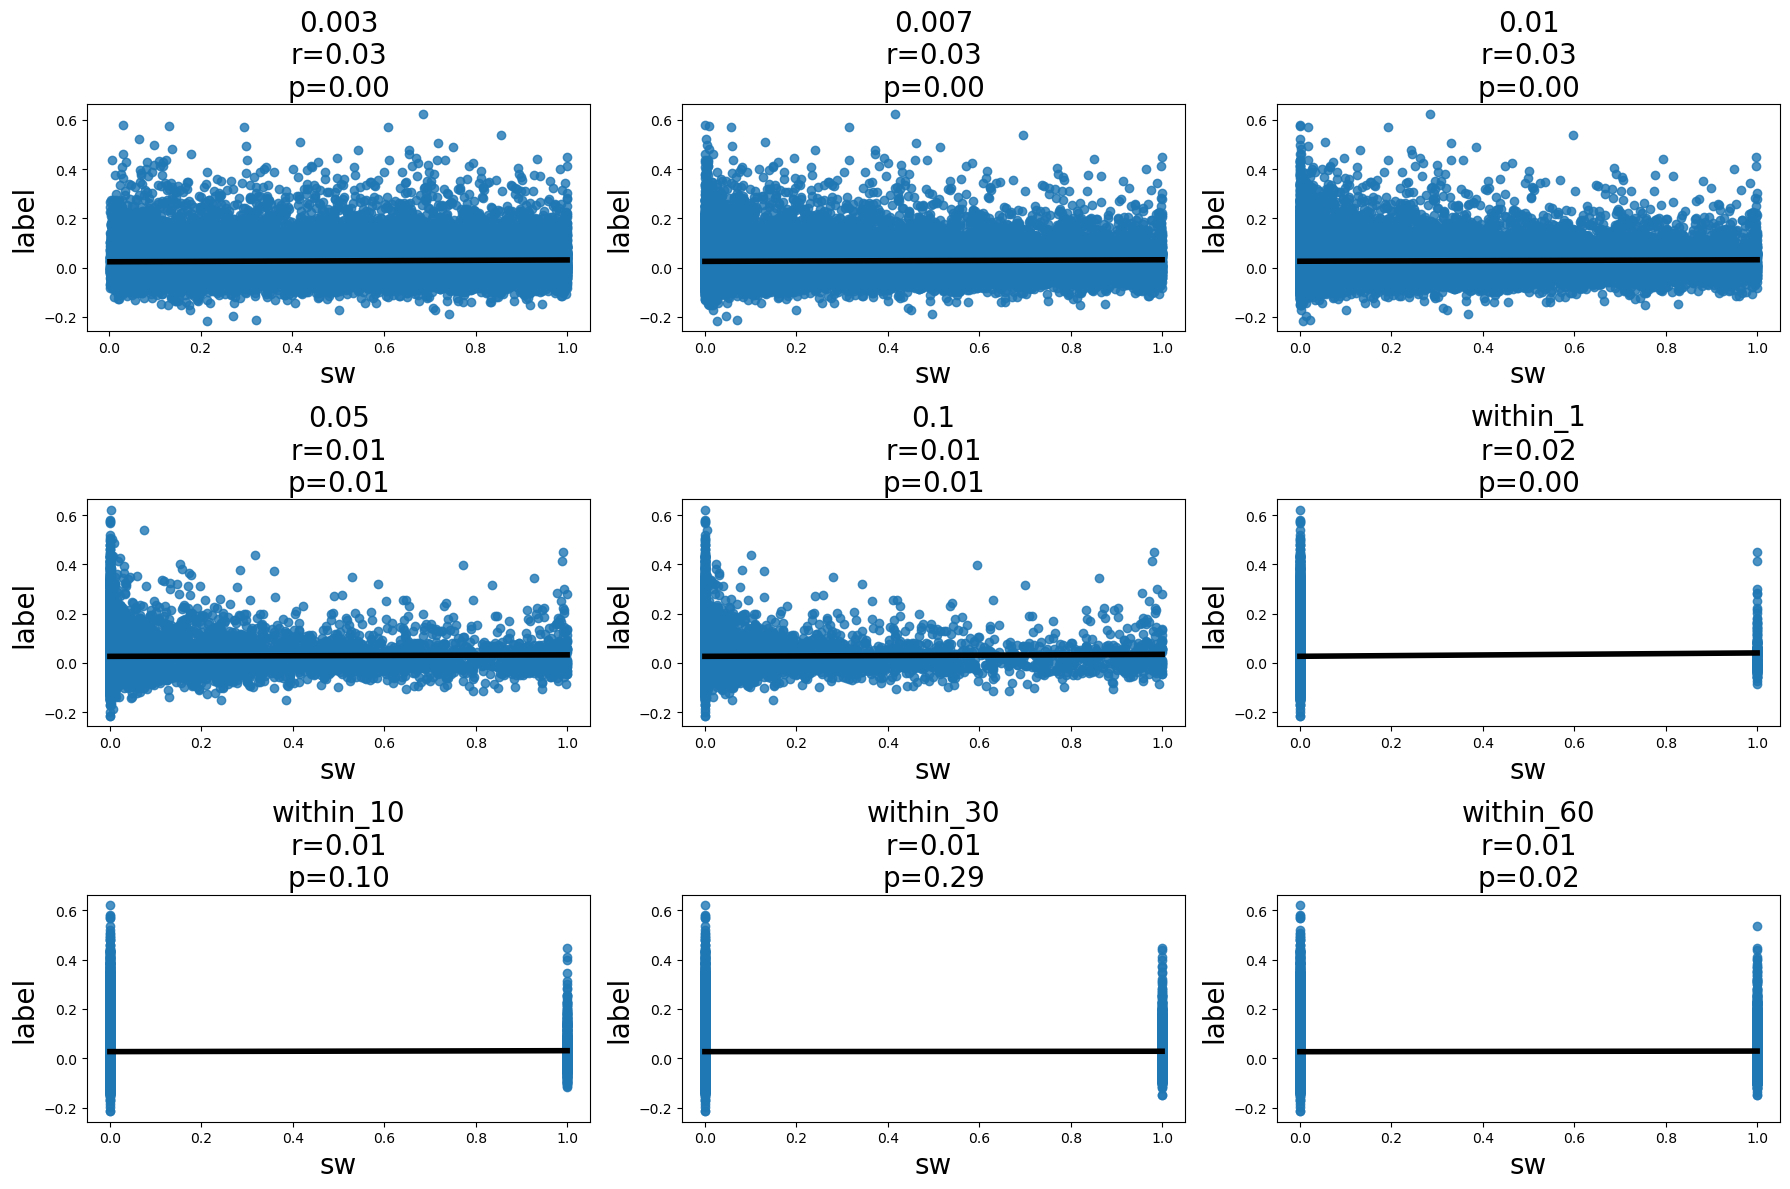

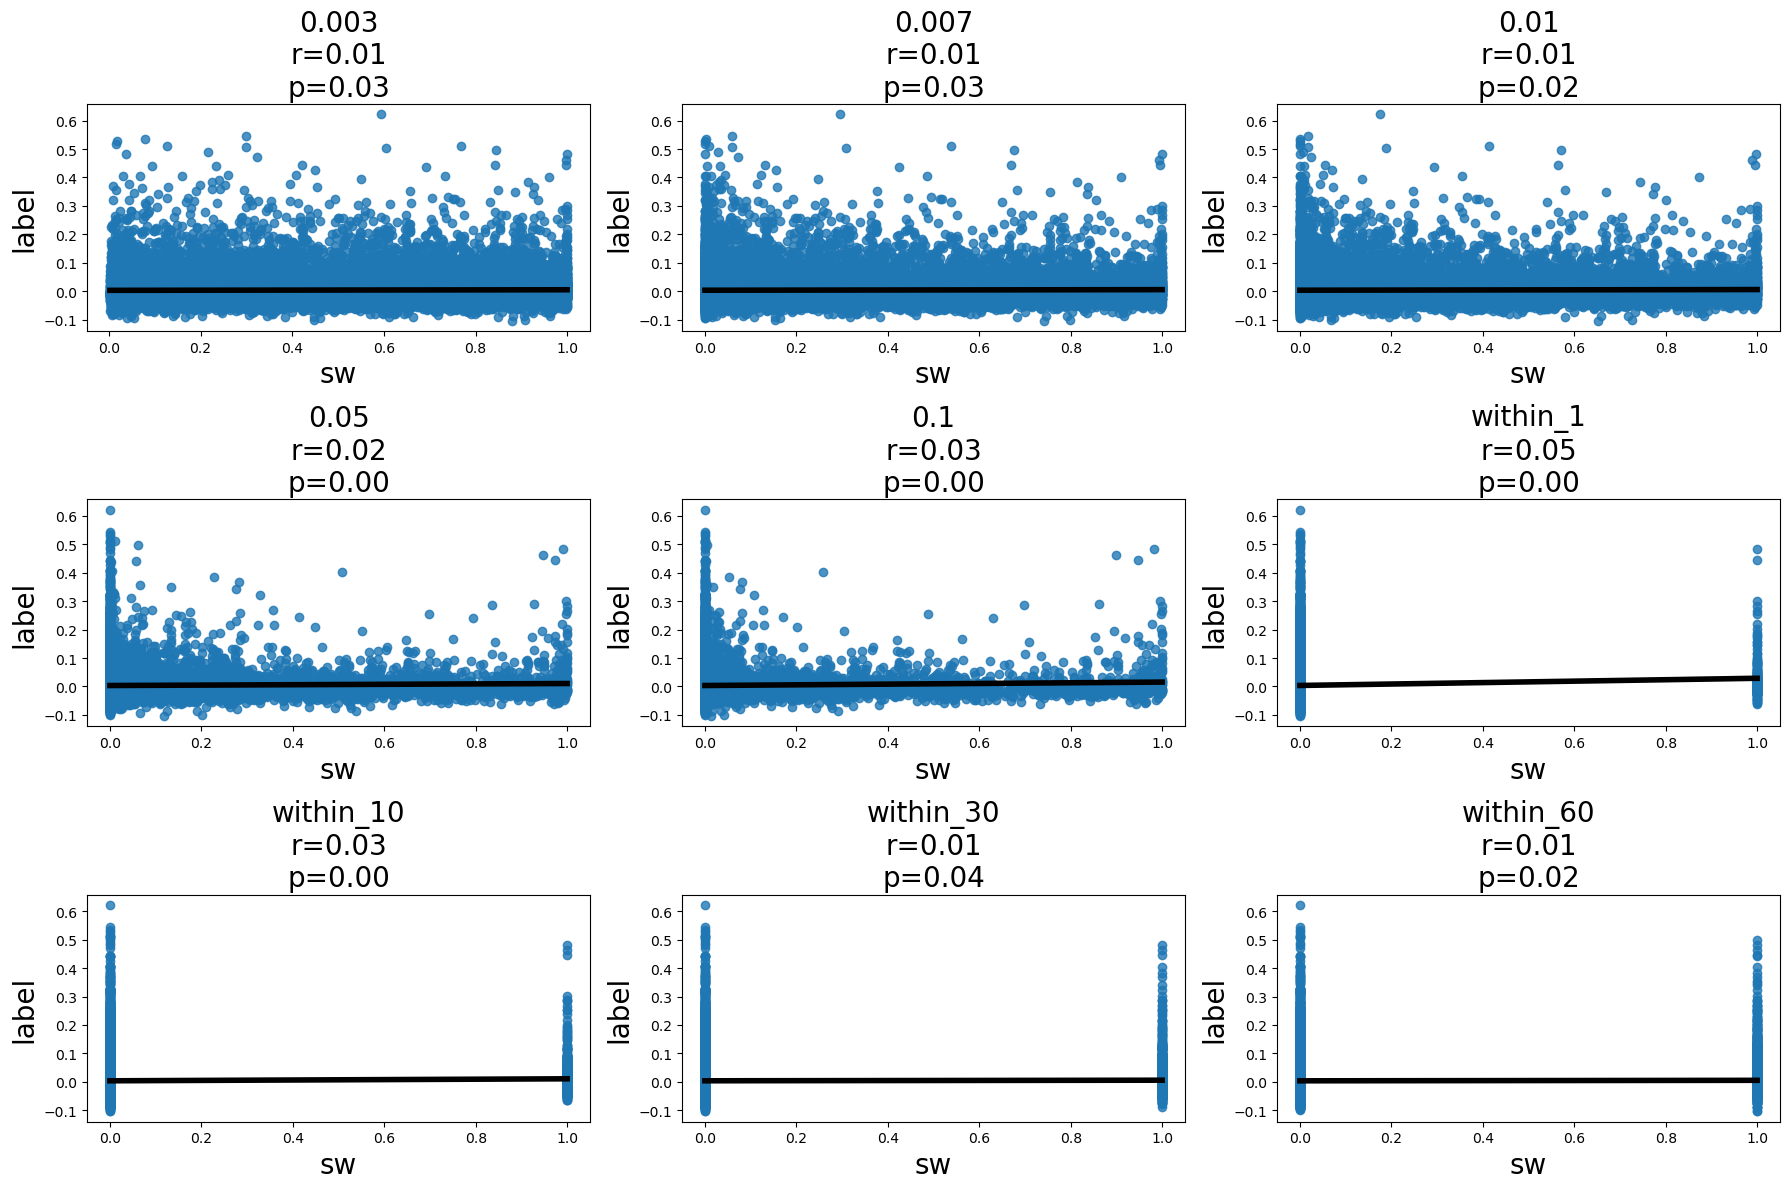

In [240]:
%%time
for kk in kk_l:
    kk_str='_'.join([str(i) for i in kk])
    label_sim = label_sim_all_d[kk].loc[kk].dropna(axis=1,how='all').dropna(axis=0,how='all')
    onoff_str_d = {1:'on',-1:'off','both':'both'}
    onoff = 1
    onoff_str = onoff_str_d[onoff]

    gpb=sw_sim_allonoff.loc[onoff].groupby(level=0)
    nplots = len(gpb)
    fig,axs=ph.subplots_wrapper(nplots)
    for ii,(sw_sim_key,val) in enumerate(gpb):
        ax=axs.ravel()[ii]
        sw_sim = sw_sim_allonoff.loc[onoff,sw_sim_key].dropna(axis=1,how='all').dropna(axis=0,how='all')

        reload(pwa)
        label_sim,sw_sim,label_sim_flatten,sw_sim_flatten = pwa.dropna_intersect_ind_flatten(label_sim,sw_sim)

        label_sw_sim_flatten_df = pd.DataFrame([label_sim_flatten,sw_sim_flatten],index=['label','sw']).T
        r,pval=scipy.stats.pearsonr(label_sw_sim_flatten_df.iloc[:,0],label_sw_sim_flatten_df.iloc[:,1])
        sns.regplot(data=label_sw_sim_flatten_df,x='sw',y='label',ax=ax,line_kws={"color":'k','linewidth':4,'zorder':10})
        ax.set_title(str(sw_sim_key)+f'\nr={r:.02f}\np={pval:.02f}')
    plt.tight_layout()
    fig_fn = f'{kk_str}_vs_all_sw_sim_{onoff_str}.pdf'
    fig.savefig(os.path.join(data_dir_full,'py_figures','switch_analysis',fig_fn),bbox_inches='tight')

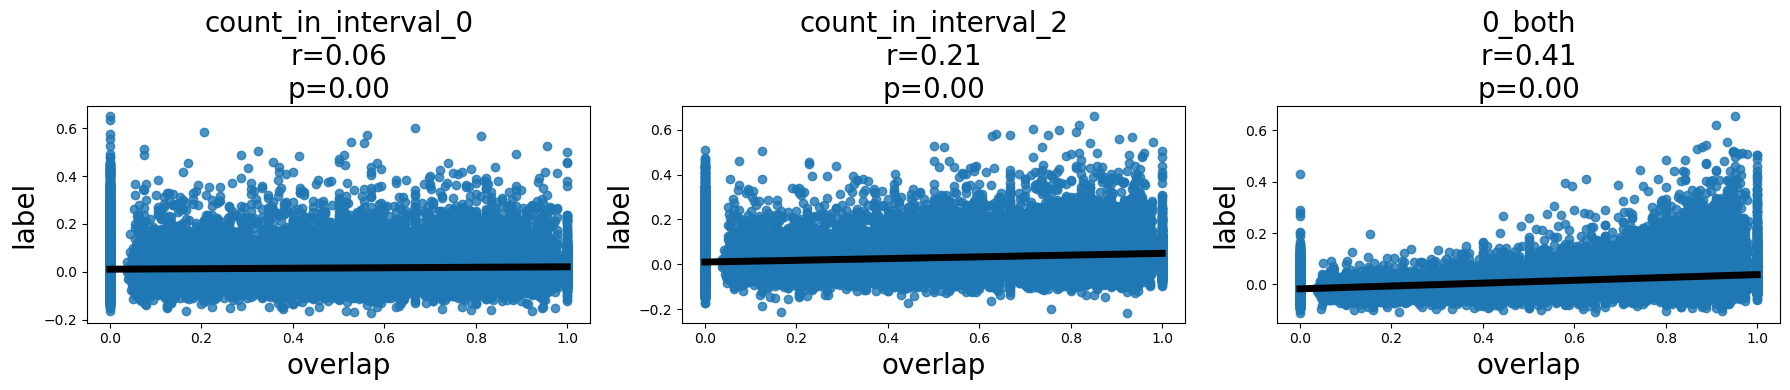

In [217]:
nplots = len(kk_l)
fig,axs=ph.subplots_wrapper(nplots)
for ii,kk in enumerate(kk_l):
    ax=axs.ravel()[ii]
    kk_str='_'.join([str(i) for i in kk])
    label_sim = label_sim_all_d[kk].loc[kk].dropna(axis=1,how='all').dropna(axis=0,how='all')
    
    
    sw_sim = overlap_ratio


    label_sim,sw_sim,label_sim_flatten,sw_sim_flatten = pwa.dropna_intersect_ind_flatten(label_sim,sw_sim)

    label_sw_sim_flatten_df = pd.DataFrame([label_sim_flatten,sw_sim_flatten],index=['label','overlap']).T
    
    r,pval=scipy.stats.pearsonr(label_sw_sim_flatten_df.iloc[:,0],label_sw_sim_flatten_df.iloc[:,1])
    sns.regplot(data=label_sw_sim_flatten_df,x='overlap',y='label',ax=ax,line_kws={"color":'k','linewidth':4,'zorder':10})
    ax.set_title(kk_str+f'\nr={r:.02f}\np={pval:.02f}')
plt.tight_layout()
fig_fn = f'{kk_str}_vs_field_overlap_ratio.pdf'
fig.savefig(os.path.join(data_dir_full,'py_figures','switch_analysis',fig_fn),bbox_inches='tight')

In [213]:
scipy.stats.pearsonr(label_sw_sim_flatten_df.iloc[:,0],label_sw_sim_flatten_df.iloc[:,1])

(0.41414097064299976, 0.0)

In [206]:
rcorr = label_sw_sim_flatten_df.rcorr(stars=False)
pval=rcorr.iloc[0,1]


label overlap
label        -      0.
overlap  0.414       -

In [137]:
overlap_ratio

3.0       27.0      29.0      30.0      31.0      32.0      33.0   \
3.0    1.000000  0.400000  0.923077  0.048780  0.000000  0.000000  0.893617   
27.0   0.400000  1.000000  0.473684  0.816327  0.000000  0.000000  0.509091   
29.0   0.923077  0.473684  1.000000  0.857143  0.823529  0.761905  0.818182   
30.0   0.048780  0.816327  0.857143  1.000000  0.370370  0.514286  0.217391   
31.0   0.000000  0.000000  0.823529  0.370370  1.000000  0.875000  0.500000   
...         ...       ...       ...       ...       ...       ...       ...   
468.0  0.000000  0.000000  0.296296  0.000000  0.551724  0.560000  0.952381   
474.0  0.000000  0.000000  0.689655  0.000000  0.714286  0.833333  0.600000   
475.0  0.941176  0.255319  0.777778  0.000000  0.000000  0.000000  0.840000   
476.0  0.888889  0.244898  0.736842  0.000000  0.000000  0.000000  0.833333   
480.0  0.000000  0.000000  0.764706  0.296296  0.944444  0.875000  0.571429   

          34.0      35.0      36.0   ...     459.0     462.0     463.0  \
3.0    0.000000  0.387097  0.555556  ...  0.000000  0.357143  0.384615   
27.0   0.342857  0.294118  0.681818  ...  0.000000  0.388889  0.294118   
29.0   0.800000  0.780488  0.606061  ...  0.941176  0.400000  0.434783   
30.0   0.666667  0.588235  0.342857  ...  0.518519  0.222222  0.000000   
31.0   0.352941  0.837209  0.750000  ...  0.888889  0.000000  0.923077   
...         ...       ...       ...  ...       ...       ...       ...   
468.0  0.000000  0.769231  0.800000  ...  0.413793  0.000000  0.000000   
474.0  0.090909  0.800000  0.833333  ...  0.642857  0.000000  0.555556   
475.0  0.303030  0.625000  0.363636  ...  0.000000  0.080000  0.347826   
476.0  0.193548  0.600000  0.342857  ...  0.000000  0.074074  0.320000   
480.0  0.000000  0.848485  0.812500  ...  0.833333  0.000000  0.000000   

          465.0     466.0     468.0     474.0     475.0     476.0     480.0  
3.0    0.636364  0.000000  0.000000  0.000000  0.941176  0.888889  0.000000  
27.0   0.730769  0.000000  0.000000  0.000000  0.255319  0.244898  0.000000  
29.0   0.682927  0.551724  0.296296  0.689655  0.777778  0.736842  0.764706  
30.0   0.465116  0.000000  0.000000  0.000000  0.000000  0.000000  0.296296  
31.0   0.000000  0.705882  0.551724  0.714286  0.000000  0.000000  0.944444  
...         ...       ...       ...       ...       ...       ...       ...  
468.0  0.000000  0.000000  1.000000  0.666667  0.000000  0.000000  0.620690  
474.0  0.000000  0.818182  0.666667  1.000000  0.000000  0.000000  0.714286  
475.0  0.487805  0.000000  0.000000  0.000000  1.000000  0.952381  0.000000  
476.0  0.465116  0.000000  0.000000  0.000000  0.952381  1.000000  0.000000  
480.0  0.000000  0.000000  0.620690  0.714286  0.000000  0.000000  1.000000  

[321 rows x 321 columns]

In [125]:
st=pf_all_field_combined['start'].values
ed = pf_all_field_combined['end'].values
width = (pf_all_field_combined['end'] - pf_all_field_combined['start']).values

overlap = np.minimum.outer(ed,ed) - np.maximum.outer(st,st)
overlap[overlap<0]=0
width_sum = np.add.outer(width,width)

overlap_ratio = overlap * 2 / width_sum

In [133]:
overlap_ratio

array([[1.0, 0.26666666666666666, 0.0, ..., 0.0, 0.18181818181818182,
        0.0],
       [0.26666666666666666, 1.0, 0.47368421052631576, ...,
        0.6511627906976745, 0.7391304347826086, 0.5128205128205128],
       [0.0, 0.47368421052631576, 1.0, ..., 0.08695652173913043, 0.0,
        0.9473684210526315],
       ...,
       [0.0, 0.6511627906976745, 0.08695652173913043, ..., 1.0,
        0.8387096774193549, 0.16666666666666666],
       [0.18181818181818182, 0.7391304347826086, 0.0, ...,
        0.8387096774193549, 1.0, 0.07407407407407407],
       [0.0, 0.5128205128205128, 0.9473684210526315, ...,
        0.16666666666666666, 0.07407407407407407, 1.0]], dtype=object)

In [123]:
pf_all_field_combined.iloc[0]

start            24
end              40
com              32
peak             32
fr_peak    2.329971
fr_mean    1.259748
Name: (0, 3, 0), dtype: object

In [124]:
pf_all_field_combined.iloc[2]

start             1
end              10
com               5
peak              4
fr_peak    8.114678
fr_mean     7.49303
Name: (0, 29, 0), dtype: object

In [121]:
overlap[overlap<0] = 0


array([[16, 6, -14, ..., -1, 3, -13],
       [6, 29, 9, ..., 14, 17, 10],
       [-14, 9, 9, ..., 1, 0, 9],
       ...,
       [-1, 14, 1, ..., 14, 13, 2],
       [3, 17, 0, ..., 13, 17, 1],
       [-13, 10, 9, ..., 2, 1, 10]], dtype=object)

In [119]:
ed

array([40, 30, 10, 85, 21, 89, 88, 42, 7, 52, 92, 30, 53, 91, 55, 75, 11,
       69, 11, 41, 80, 83, 33, 66, 91, 52, 89, 81, 92, 51, 70, 35, 52, 56,
       82, 78, 92, 25, 46, 92, 48, 14, 66, 7, 47, 84, 55, 18, 47, 85, 38,
       79, 88, 53, 92, 92, 52, 9, 52, 56, 9, 39, 79, 86, 16, 52, 92, 22,
       54, 81, 80, 81, 75, 28, 43, 60, 64, 50, 83, 41, 92, 52, 60, 78, 25,
       79, 31, 9, 77, 89, 55, 19, 53, 85, 67, 72, 49, 89, 12, 55, 40, 74,
       48, 39, 64, 40, 89, 44, 92, 63, 56, 48, 92, 19, 52, 17, 82, 53, 85,
       92, 47, 72, 92, 85, 86, 53, 83, 84, 52, 53, 48, 92, 69, 70, 92, 43,
       31, 84, 21, 44, 52, 84, 54, 9, 37, 42, 54, 62, 41, 9, 52, 22, 40,
       79, 22, 92, 92, 59, 9, 44, 12, 8, 85, 61, 72, 13, 11, 81, 92, 60,
       80, 6, 23, 37, 9, 21, 44, 64, 88, 43, 83, 39, 92, 52, 86, 68, 10,
       57, 87, 59, 55, 45, 92, 81, 44, 92, 80, 83, 53, 52, 92, 80, 85, 77,
       65, 77, 77, 10, 92, 50, 43, 72, 43, 92, 17, 89, 42, 12, 5, 87, 5,
       84, 88, 92, 89, 13, 85, 85, 90,

In [118]:
st

array([24, 1, 1, 69, 1, 71, 62, 16, 1, 41, 67, 15, 43, 77, 38, 51, 1, 61,
       1, 25, 63, 65, 8, 54, 85, 33, 83, 66, 86, 36, 58, 5, 44, 49, 65,
       64, 85, 18, 39, 78, 18, 1, 54, 1, 27, 58, 48, 1, 41, 74, 11, 56,
       68, 49, 71, 75, 37, 1, 46, 52, 1, 24, 62, 60, 11, 42, 78, 5, 50,
       66, 63, 57, 56, 21, 31, 55, 51, 34, 54, 22, 73, 46, 52, 65, 7, 67,
       25, 2, 63, 83, 47, 14, 45, 75, 54, 59, 26, 78, 1, 43, 15, 60, 31,
       23, 52, 25, 74, 30, 83, 55, 49, 34, 80, 13, 34, 1, 59, 46, 67, 84,
       22, 55, 88, 70, 57, 44, 71, 68, 25, 44, 26, 81, 60, 57, 84, 32, 10,
       63, 9, 28, 48, 69, 47, 1, 30, 28, 47, 49, 19, 1, 43, 4, 30, 62, 14,
       68, 82, 54, 1, 36, 1, 1, 69, 52, 66, 1, 1, 64, 87, 39, 70, 1, 18,
       26, 4, 14, 24, 55, 81, 32, 64, 31, 81, 43, 72, 48, 1, 52, 78, 48,
       37, 32, 86, 60, 28, 87, 63, 65, 44, 41, 85, 55, 55, 56, 52, 56, 55,
       1, 69, 33, 30, 59, 30, 85, 11, 74, 33, 1, 1, 70, 1, 78, 68, 81, 73,
       1, 66, 72, 76, 78, 31, 39, 30, 82, 4

In [109]:
pf_all_field_combined['end']

           field_index
0     3    0              40
      27   0              30
      29   0              10
           2              85
      30   0              21
                          ..
both  386  1              34
      387  0              22
      443  0              23
      448  0              27
      455  0              11
Name: end, Length: 709, dtype: object

In [106]:
pwa.get_diff_min_uid_pair(pf_all_field_combined['peak'],pf_all_field_combined.index.get_level_values(1))

3.0    27.0   29.0   30.0   31.0   32.0   33.0   34.0   35.0   36.0   \
3.0      0.0   16.0    1.0   25.0   21.0   30.0    2.0   11.0    7.0    9.0   
27.0    16.0    0.0   11.0    9.0   38.0   47.0   14.0   14.0    9.0    7.0   
29.0     1.0   11.0    0.0    2.0    3.0    1.0    1.0    3.0    3.0    7.0   
30.0    25.0    9.0    2.0    0.0    9.0    9.0   14.0    5.0    5.0   13.0   
31.0    21.0   38.0    3.0    9.0    0.0    0.0    5.0    9.0    6.0    4.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
468.0   54.0   71.0    8.0   14.0    5.0    4.0    0.0   42.0    1.0    1.0   
474.0   25.0   42.0    4.0   11.0    2.0    1.0    3.0   13.0    4.0    2.0   
475.0    4.0   21.0    6.0   30.0   13.0   22.0    7.0    3.0    1.0    7.0   
476.0    0.0   14.0    1.0   23.0   21.0   30.0    0.0   11.0    5.0    7.0   
480.0   50.0   67.0    4.0   10.0    1.0    0.0    4.0   38.0    5.0    3.0   

       ...  459.0  462.0  463.0  465.0  466.0  468.0  474.0  475.0  476.0  \
3.0    ...   47.0    9.0    5.0   10.0   23.0   54.0   25.0    4.0    0.0   
27.0   ...   64.0    7.0   11.0    6.0   40.0   71.0   42.0   21.0   14.0   
29.0   ...    1.0    8.0    4.0    9.0    6.0    8.0    4.0    6.0    1.0   
30.0   ...    7.0   16.0   19.0   15.0   17.0   14.0   11.0   30.0   23.0   
31.0   ...    2.0   31.0    0.0   32.0    2.0    5.0    2.0   13.0   21.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
468.0  ...    7.0   64.0   33.0   65.0   31.0    0.0    3.0   46.0   54.0   
474.0  ...    4.0   35.0    4.0   36.0    2.0    3.0    0.0   17.0   25.0   
475.0  ...   39.0   14.0   10.0   15.0   15.0   46.0   17.0    0.0    4.0   
476.0  ...   47.0    7.0    3.0    8.0   23.0   54.0   25.0    4.0    0.0   
480.0  ...    3.0   60.0   29.0   61.0   27.0    4.0    1.0   42.0   50.0   

       480.0  
3.0     50.0  
27.0    67.0  
29.0     4.0  
30.0    10.0  
31.0     1.0  
...      ...  
468.0    4.0  
474.0    1.0  
475.0   42.0  
476.0   50.0  
480.0    0.0  

[321 rows x 321 columns]

In [94]:
pf_all_field_combined.loc['both'].shape

(53, 6)

In [92]:
pf_all_field_combined.loc[1]

start end com peak   fr_peak    fr_mean
    field_index                                        
3   0              20  41  31   31  3.137807    1.88997
29  2              52  70  61   61  19.64729  12.646518
30  0               1  13   6    6     8.327    7.05665
    1              67  76  71   72  4.826264   4.421206
31  0              49  55  52   53  2.088926    1.80024
...               ...  ..  ..  ...       ...        ...
468 0              81  92  86   86  1.415304   1.037694
474 0              51  62  56   57  1.460745   0.959989
    1              78  88  83   83  1.320478   0.977215
475 0              24  46  36   40  7.244481   4.140691
476 0              24  44  33   32  2.977506    1.96505

[323 rows x 6 columns]

In [91]:
pf_all_field_combined.loc[0]

start end com peak    fr_peak    fr_mean
    field_index                                         
3   0              24  40  32   32   2.329971   1.259748
27  0               1  30  15   15   27.42802  21.757817
29  0               1  10   5    4   8.114678    7.49303
    2              69  85  76   78  13.805456   9.883463
30  0               1  21   8    6  10.134196   6.402575
...               ...  ..  ..  ...        ...        ...
463 1              49  56  52   53   1.105246   0.919499
465 0              11  34  22   21   2.176381   1.154307
475 0              24  42  33   36   5.028874   3.177112
476 0              28  40  33   29   1.152027   0.991878
480 0              72  90  81   82   10.78562    7.47471

[333 rows x 6 columns]

In [89]:
pf_all_field_combined.loc

start end com peak    fr_peak    fr_mean
         field_index                                         
0    3   0              24  40  32   32   2.329971   1.259748
     27  0               1  30  15   15   27.42802  21.757817
     29  0               1  10   5    4   8.114678    7.49303
         2              69  85  76   78  13.805456   9.883463
     30  0               1  21   8    6  10.134196   6.402575
...                    ...  ..  ..  ...        ...        ...
both 386 1              28  34  30   31   3.717434   3.115736
     387 0               7  22  15   15   7.033523   3.931653
     443 0               9  23  16   16  13.260107   8.015005
     448 0              10  27  18   19  10.979548   6.593008
     455 0               1  11   5    6   1.657099   1.311049

[709 rows x 6 columns]

In [ ]:
%%time
sub_db =db.loc[['e13_26m1','e15_13f1','e15_10m1','e16_1f1']].sort_values('n_pyr_putative',ascending=False)
fail_l = []

In [36]:
res.keys()

dict_keys(['all_sw_info', 'pf_fr_combined', 'pf_all_field_combined', 'fr_map_trial_df_d', 'changes_df_combined', 'spk_beh_df', 'cell_cols_d'])

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/switch_res_window.p exists; loading---


In [41]:
test_res['pos_to_time_func_per_trial']

{0.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341e9f0>,
 1.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341eae0>,
 2.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341eb30>,
 3.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ebd0>,
 4.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341eb80>,
 5.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ec20>,
 6.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ec70>,
 7.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ecc0>,
 8.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ed10>,
 9.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ed60>,
 10.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341edb0>,
 11.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ee00>,
 12.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341ee50>,
 13.0: <scipy.interpolate._interpolate.interp1d at 0x1554a341eea0>,
 14.0: <scipy.interpolate._interpolate.interp1d at 0x1554a

In [40]:
test_res['pf_loc_combined']

0     1     2     3     4     5     6     7     8     9   ...  \
both 29  1  24.0  21.0  17.0  21.0  19.0  26.0  22.0  25.0  23.0  32.0  ...   
     35  0  10.0   1.0   6.0   1.0   1.0   1.0   1.0   3.0   1.0   1.0  ...   
     37  0   8.0   8.0   8.0   8.0  13.0   8.0   8.0   8.0   8.0  11.0  ...   
     48  0   1.0  11.0   9.0  10.0   2.0  14.0   1.0  11.0  12.0  12.0  ...   
     54  0  10.0  12.0  14.0  15.0  17.0  19.0  17.0  12.0  13.0  17.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1    468 0  81.0   NaN  81.0   NaN  84.0  83.0   NaN  82.0   NaN  85.0  ...   
     474 0  58.0   NaN  54.0   NaN  56.0  54.0   NaN  53.0   NaN  54.0  ...   
         1  78.0   NaN  78.0   NaN  78.0  81.0   NaN  80.0   NaN  79.0  ...   
     475 0  29.0   NaN  27.0   NaN  30.0  30.0   NaN  33.0   NaN  41.0  ...   
     476 0  27.0   NaN  30.0   NaN  31.0  32.0   NaN  32.0   NaN  40.0  ...   

              60    61    62    63    64    65    66    67    68    69  
both 29  1  27.0  33.0  34.0  30.0  35.0  30.0  32.0  26.0  29.0  21.0  
     35  0   1.0   6.0   1.0   1.0   4.0   6.0   1.0   9.0   1.0   1.0  
     37  0  11.0   9.0  14.0  13.0  14.0  16.0  14.0  14.0   9.0  13.0  
     48  0   7.0  10.0  10.0  13.0   7.0   6.0   9.0   7.0  15.0   6.0  
     54  0  16.0  14.0  15.0  13.0  17.0  12.0  17.0  19.0  16.0  10.0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1    468 0  81.0   NaN  88.0   NaN  86.0   NaN  92.0  88.0   NaN  81.0  
     474 0  57.0   NaN  59.0   NaN  57.0   NaN  58.0  57.0   NaN  57.0  
         1  84.0   NaN  84.0   NaN  85.0   NaN  85.0  85.0   NaN  84.0  
     475 0  40.0   NaN  43.0   NaN  42.0   NaN  42.0  37.0   NaN  41.0  
     476 0  44.0   NaN  24.0   NaN  24.0   NaN  24.0  24.0   NaN  24.0  

[709 rows x 70 columns]

In [ ]:
spk_beh_df_all={}
cell_cols_d_all={}
fr_map_trial_df_d_all={}
pf_all_field_combined_all = {}
changes_df_combined_all = {}
all_sw_info_all = {}

for ii,((ani,ii),row) in enumerate(sub_db.iterrows()):
    ddf = row['data_dir_full']
    key = (ani,row['sess_name'])
    try: 
        ripple_res = grtpc.get_ripple_time_participation_cofiring_wrapper(ddf)
        
        res = sm.add_switch_metrics_wrapper(ddf,
                                dosave=True, save_dir='switch_analysis',save_fn='all_switch_info.p',
                                force_reload=False,
                                load_only=True)
        plt.close()
        spk_beh_df_all[key]=res['spk_beh_df']
        cell_cols_d_all[key]=res['cell_cols_d']
        fr_map_trial_df_d_all[key]=res['fr_map_trial_df_d']
        all_sw_info_all[key]=res['all_sw_info']
        pf_all_field_combined_all[key] = res['pf_all_field_combined']
        changes_df_combined_all[key] = res['changes_df_combined']
        

        
    except Exception as e:
        fail_l.append(key)
        print(f'{key} failed')
        print(e)


In [ ]:
grtpc.get_ripple_time_participation_cofiring_wrapper(data_dir_full)